In [106]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [107]:
df=pd.read_csv('file:///C:/Users/Md%20Asif%20Ikbal/Downloads/fivethirtyeight_ncaa_forecasts.csv')
df.head()

,gender,forecast_date,playin_flag,rd1_win,rd2_win,rd3_win,rd4_win,rd5_win,rd6_win,rd7_win,team_alive,team_id,team_name,team_rating,team_region,team_seed
0,mens,2018-03-12,0,1.0,0.985308,0.863123,0.668033,0.497134,0.291067,0.179788,1,222,Villanova,94.92,East,1
1,mens,2018-03-12,0,1.0,0.978539,0.831921,0.611027,0.410681,0.263779,0.137380,1,258,Virginia,93.07,South,1
2,mens,2018-03-12,0,1.0,0.958062,0.806459,0.466602,0.288302,0.162518,0.100163,1,150,Duke,92.59,Midwest,2
3,mens,2018-03-12,0,1.0,0.954136,0.764046,0.617444,0.318451,0.152683,0.082691,1,2305,Kansas,90.88,Midwest,1
4,mens,2018-03-12,0,1.0,0.922757,0.750633,0.404491,0.244351,0.120661,0.066905,1,127,Michigan State,91.67,Midwest,3


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         600 non-null    object 
 1   forecast_date  600 non-null    object 
 2   playin_flag    600 non-null    int64  
 3   rd1_win        600 non-null    float64
 4   rd2_win        600 non-null    float64
 5   rd3_win        600 non-null    float64
 6   rd4_win        600 non-null    float64
 7   rd5_win        600 non-null    float64
 8   rd6_win        600 non-null    float64
 9   rd7_win        600 non-null    float64
 10  team_alive     600 non-null    int64  
 11  team_id        600 non-null    int64  
 12  team_name      600 non-null    object 
 13  team_rating    600 non-null    float64
 14  team_region    600 non-null    object 
 15  team_seed      600 non-null    object 
dtypes: float64(8), int64(3), object(5)
memory usage: 75.1+ KB


In [109]:
df.shape

(600, 16)

In [110]:
df.isnull().sum()

gender           0
forecast_date    0
playin_flag      0
rd1_win          0
rd2_win          0
rd3_win          0
rd4_win          0
rd5_win          0
rd6_win          0
rd7_win          0
team_alive       0
team_id          0
team_name        0
team_rating      0
team_region      0
team_seed        0
dtype: int64

In [111]:
df.dtypes

gender            object
forecast_date     object
playin_flag        int64
rd1_win          float64
rd2_win          float64
rd3_win          float64
rd4_win          float64
rd5_win          float64
rd6_win          float64
rd7_win          float64
team_alive         int64
team_id            int64
team_name         object
team_rating      float64
team_region       object
team_seed         object
dtype: object

In [112]:
df.describe()

,playin_flag,rd1_win,rd2_win,rd3_win,rd4_win,rd5_win,rd6_win,rd7_win,team_alive,team_id,team_rating
count,600.00000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.00000
mean,0.08000,0.960000,0.480000,0.240000,0.120000,0.060000,0.030000,0.015000,0.743333,1119.385000,82.87295
std,0.27152,0.183419,0.420236,0.319498,0.210872,0.132655,0.084523,0.057067,0.437158,1123.544096,7.88683
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,60.58000
25%,0.00000,1.000000,0.000792,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,151.500000,78.49000
50%,0.00000,1.000000,0.417393,0.067729,0.016300,0.003782,0.000624,0.000087,1.000000,264.000000,83.29000
75%,0.00000,1.000000,0.977820,0.443180,0.126864,0.034155,0.012627,0.003706,1.000000,2378.000000,87.86000
max,1.00000,1.000000,1.000000,1.000000,0.987403,0.959575,0.884543,0.762888,1.000000,2755.000000,115.60000


In [113]:
df.corr().describe().T

,count,mean,std,min,25%,50%,75%,max
playin_flag,11.0,-0.101335,0.415667,-0.740161,-0.234669,-0.160465,-0.090019,1.0
rd1_win,11.0,0.133767,0.397742,-0.740161,0.067176,0.122539,0.234937,1.0
rd2_win,11.0,0.433604,0.390300,-0.267077,0.272295,0.516183,0.683944,1.0
rd3_win,11.0,0.514006,0.404263,-0.202262,0.300869,0.643211,0.779407,1.0
rd4_win,11.0,0.535483,0.413790,-0.160465,0.228605,0.650772,0.857515,1.0
rd5_win,11.0,0.526437,0.425952,-0.130034,0.181991,0.675795,0.874462,1.0
rd6_win,11.0,0.491754,0.421664,-0.116416,0.142942,0.597022,0.874656,1.0
rd7_win,11.0,0.430176,0.395250,-0.103965,0.105895,0.492877,0.731968,1.0
team_alive,11.0,0.300037,0.320702,-0.192406,0.181661,0.266000,0.388222,1.0
team_id,11.0,-0.004942,0.344921,-0.310294,-0.111193,-0.103965,-0.045114,1.0


In [114]:
df.mean()

playin_flag       0.080000
rd1_win           0.960000
rd2_win           0.480000
rd3_win           0.240000
rd4_win           0.120000
rd5_win           0.060000
rd6_win           0.030000
rd7_win           0.015000
team_alive        0.743333
team_id        1119.385000
team_rating      82.872950
dtype: float64

In [115]:
df.min()

gender                 mens
forecast_date    2018-03-12
playin_flag               0
rd1_win                 0.0
rd2_win                 0.0
rd3_win                 0.0
rd4_win                 0.0
rd5_win                 0.0
rd6_win                 0.0
rd7_win                 0.0
team_alive                0
team_id                   2
team_name           Alabama
team_rating           60.58
team_region          Albany
team_seed                 1
dtype: object

In [116]:
df.max()

gender               womens
forecast_date    2018-03-17
playin_flag               1
rd1_win                 1.0
rd2_win                 1.0
rd3_win                 1.0
rd4_win            0.987403
rd5_win            0.959575
rd6_win            0.884543
rd7_win            0.762888
team_alive                1
team_id                2755
team_name            Xavier
team_rating           115.6
team_region            West
team_seed                 9
dtype: object

In [117]:
for i  in df.columns:
    print(f'unique values in column "{i}" is\n {df[i].value_counts()}')
    print('-------------------------------------------------')

unique values in column "gender" is
 mens      408
womens    192
Name: gender, dtype: int64
-------------------------------------------------
unique values in column "forecast_date" is
 2018-03-12    132
2018-03-16    132
2018-03-17    132
2018-03-13     68
2018-03-14     68
2018-03-15     68
Name: forecast_date, dtype: int64
-------------------------------------------------
unique values in column "playin_flag" is
 0    552
1     48
Name: playin_flag, dtype: int64
-------------------------------------------------
unique values in column "rd1_win" is
 1.000000    570
0.000000     18
0.587758      2
0.412242      2
0.576083      2
0.423917      2
0.542001      1
0.457999      1
0.665022      1
0.334978      1
Name: rd1_win, dtype: int64
-------------------------------------------------
unique values in column "rd2_win" is
 0.000000    146
1.000000    128
0.403987      4
0.380190      4
0.164052      4
           ... 
0.809257      1
0.399031      1
0.605653      1
0.352196      1
0.0002

In [118]:
df.skew()

playin_flag    3.104047
rd1_win       -4.671984
rd2_win        0.080168
rd3_win        1.146118
rd4_win        2.072117
rd5_win        3.233186
rd6_win        5.686942
rd7_win        9.221790
team_alive    -1.116974
team_id        0.332788
team_rating    0.068952
dtype: float64

In [119]:
object_col=[]
num_col=[]
for i in df.columns:
    if df[i].dtype=='object':
        object_col.append(i)
    else:
        num_col.append(i)

In [120]:
nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=16:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 10 numerical & 6 categorical features.


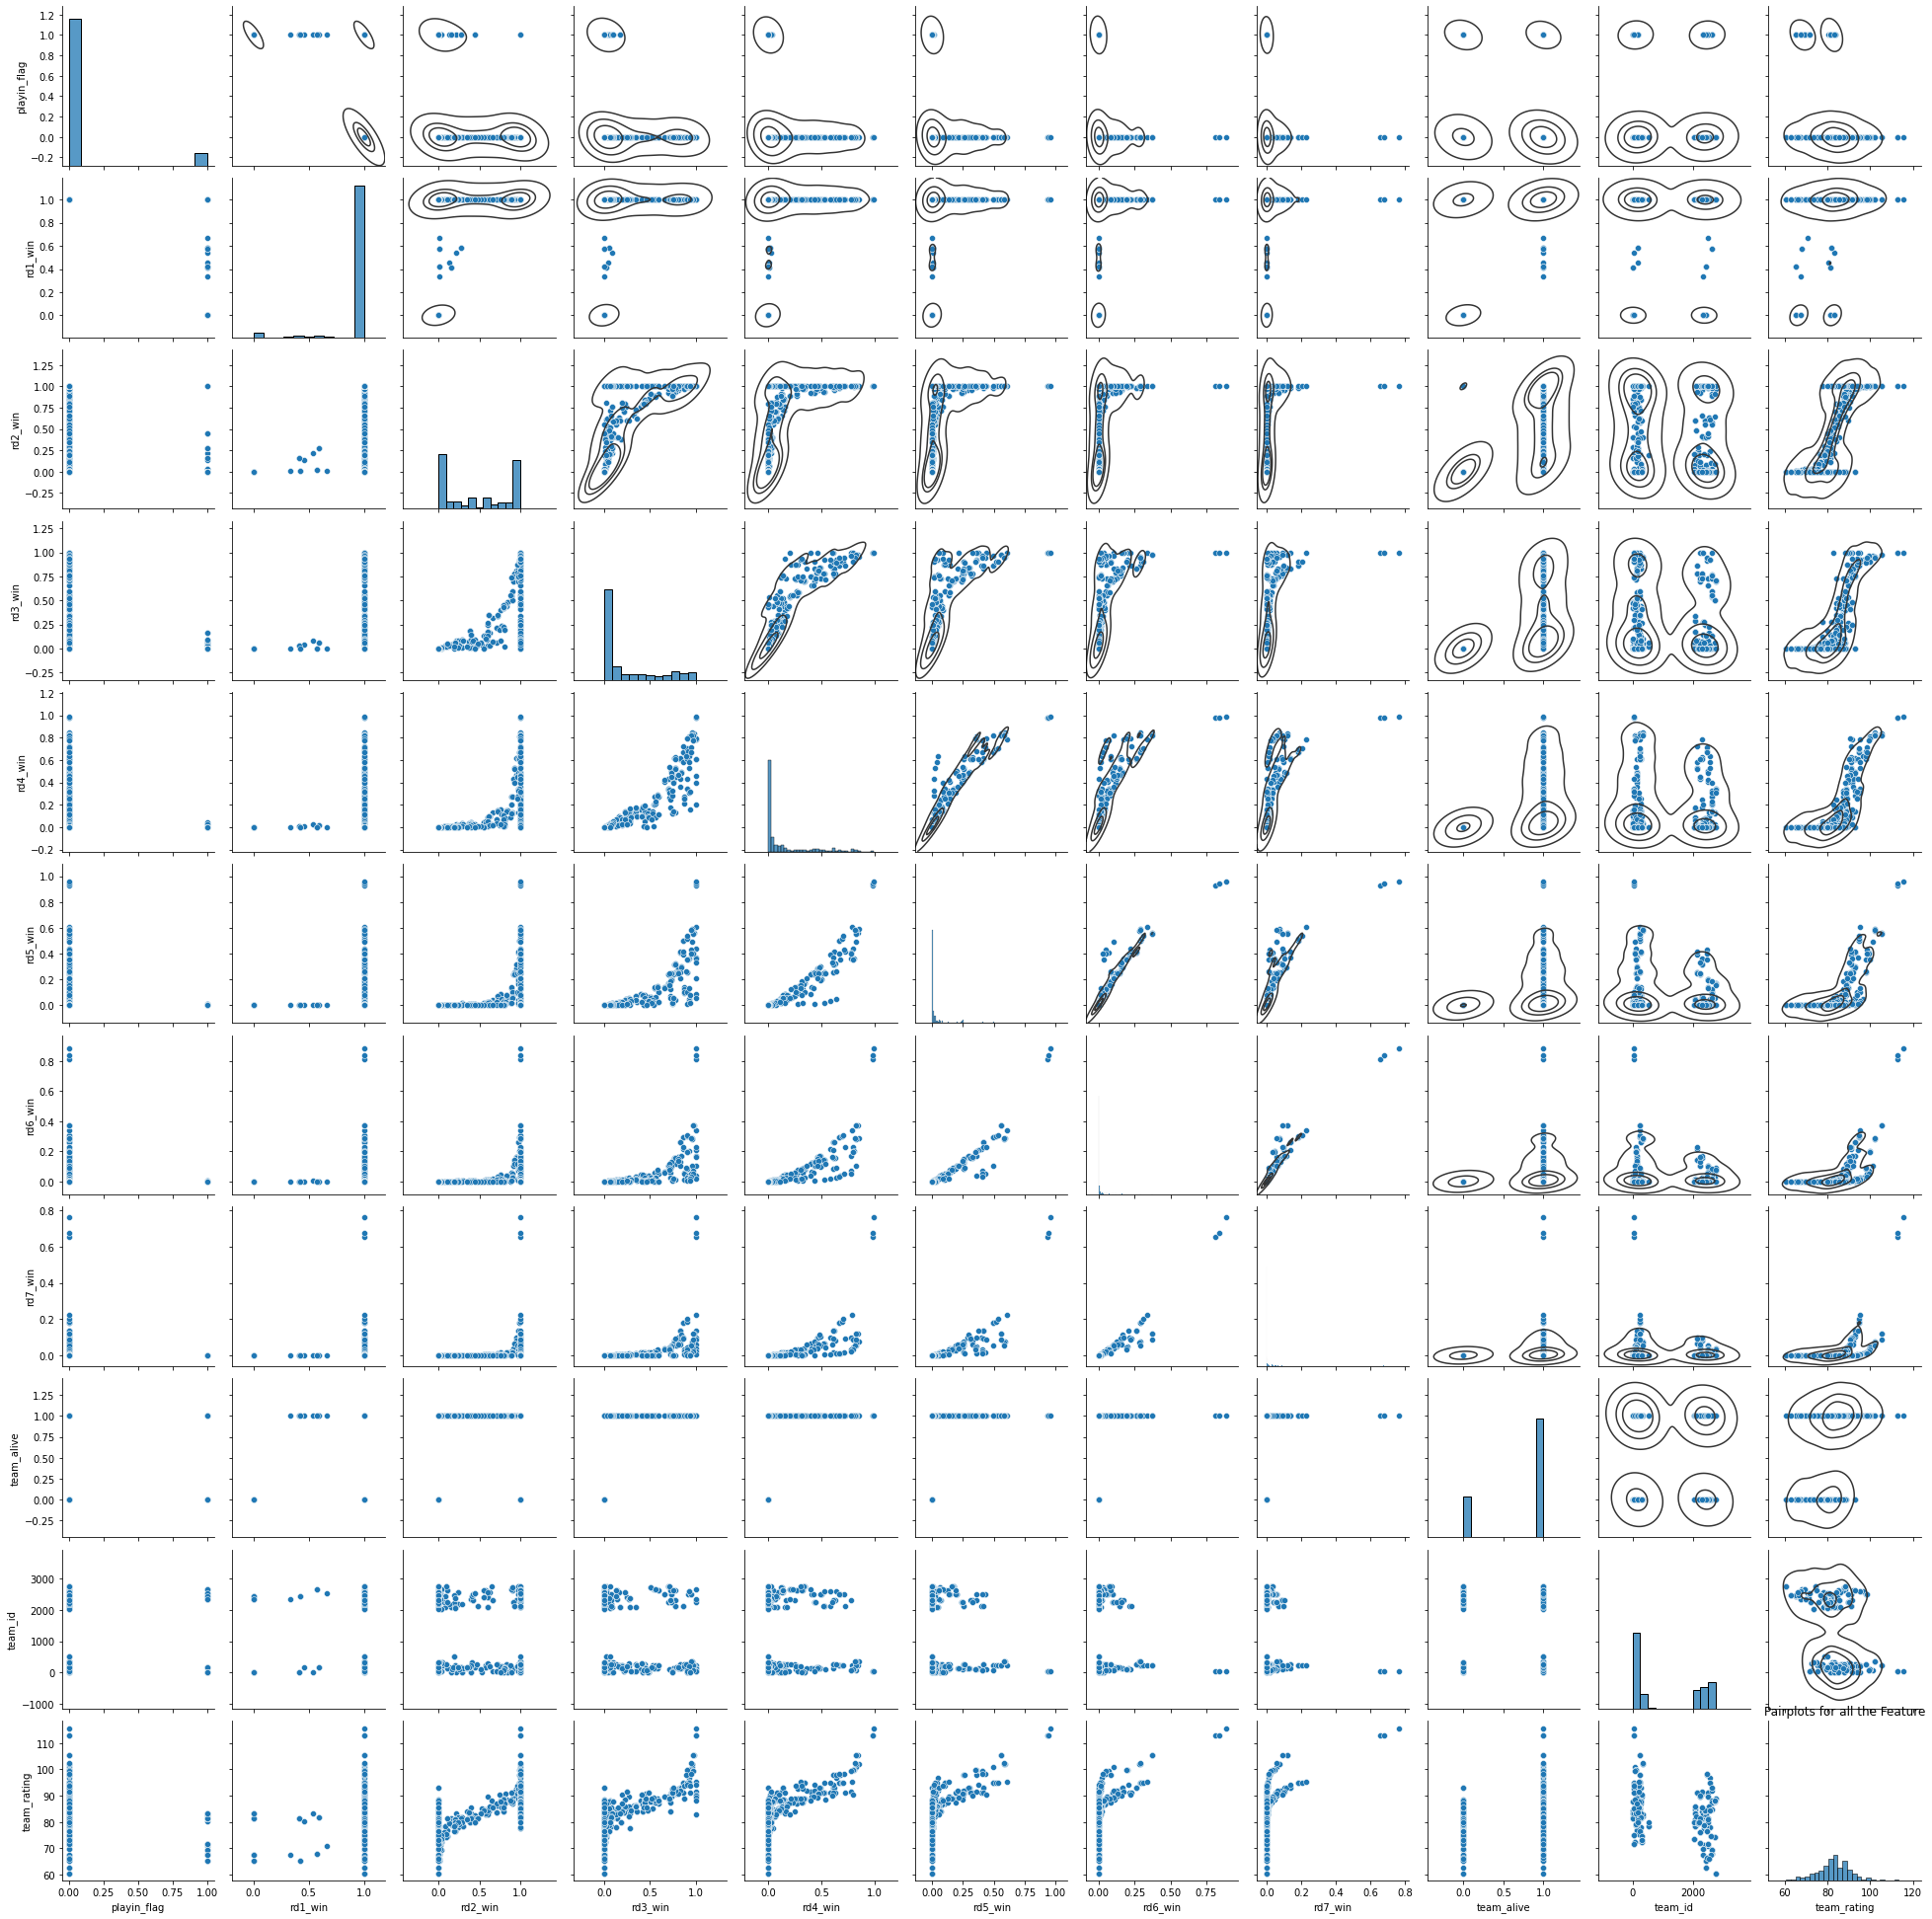

In [121]:
#Understanding the relationship between all the features

g = sns.pairplot(df)
plt.title('Pairplots for all the Feature')
g.map_upper(sns.kdeplot, levels=4, color=".2")
plt.show()

In [122]:
df.duplicated().sum()

0

In [123]:
object_col

['gender', 'forecast_date', 'team_name', 'team_region', 'team_seed']

In [124]:
num_col

['playin_flag',
 'rd1_win',
 'rd2_win',
 'rd3_win',
 'rd4_win',
 'rd5_win',
 'rd6_win',
 'rd7_win',
 'team_alive',
 'team_id',
 'team_rating']

In [125]:
df.head()

,gender,forecast_date,playin_flag,rd1_win,rd2_win,rd3_win,rd4_win,rd5_win,rd6_win,rd7_win,team_alive,team_id,team_name,team_rating,team_region,team_seed
0,mens,2018-03-12,0,1.0,0.985308,0.863123,0.668033,0.497134,0.291067,0.179788,1,222,Villanova,94.92,East,1
1,mens,2018-03-12,0,1.0,0.978539,0.831921,0.611027,0.410681,0.263779,0.137380,1,258,Virginia,93.07,South,1
2,mens,2018-03-12,0,1.0,0.958062,0.806459,0.466602,0.288302,0.162518,0.100163,1,150,Duke,92.59,Midwest,2
3,mens,2018-03-12,0,1.0,0.954136,0.764046,0.617444,0.318451,0.152683,0.082691,1,2305,Kansas,90.88,Midwest,1
4,mens,2018-03-12,0,1.0,0.922757,0.750633,0.404491,0.244351,0.120661,0.066905,1,127,Michigan State,91.67,Midwest,3


In [126]:
df=df.drop(['forecast_date','team_seed' ],axis='columns')

In [127]:
df.head()

,gender,playin_flag,rd1_win,rd2_win,rd3_win,rd4_win,rd5_win,rd6_win,rd7_win,team_alive,team_id,team_name,team_rating,team_region
0,mens,0,1.0,0.985308,0.863123,0.668033,0.497134,0.291067,0.179788,1,222,Villanova,94.92,East
1,mens,0,1.0,0.978539,0.831921,0.611027,0.410681,0.263779,0.137380,1,258,Virginia,93.07,South
2,mens,0,1.0,0.958062,0.806459,0.466602,0.288302,0.162518,0.100163,1,150,Duke,92.59,Midwest
3,mens,0,1.0,0.954136,0.764046,0.617444,0.318451,0.152683,0.082691,1,2305,Kansas,90.88,Midwest
4,mens,0,1.0,0.922757,0.750633,0.404491,0.244351,0.120661,0.066905,1,127,Michigan State,91.67,Midwest


In [128]:
df.dtypes

gender          object
playin_flag      int64
rd1_win        float64
rd2_win        float64
rd3_win        float64
rd4_win        float64
rd5_win        float64
rd6_win        float64
rd7_win        float64
team_alive       int64
team_id          int64
team_name       object
team_rating    float64
team_region     object
dtype: object

In [129]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [130]:
df_col=['team_name', 'team_region']

In [131]:
for i in df_col:
    df[i]=le.fit_transform(df[i])

In [132]:
df.head()

,gender,playin_flag,rd1_win,rd2_win,rd3_win,rd4_win,rd5_win,rd6_win,rd7_win,team_alive,team_id,team_name,team_rating,team_region
0,mens,0,1.0,0.985308,0.863123,0.668033,0.497134,0.291067,0.179788,1,222,104,94.92,1
1,mens,0,1.0,0.978539,0.831921,0.611027,0.410681,0.263779,0.137380,1,258,105,93.07,5
2,mens,0,1.0,0.958062,0.806459,0.466602,0.288302,0.162518,0.100163,1,150,26,92.59,4
3,mens,0,1.0,0.954136,0.764046,0.617444,0.318451,0.152683,0.082691,1,2305,40,90.88,4
4,mens,0,1.0,0.922757,0.750633,0.404491,0.244351,0.120661,0.066905,1,127,57,91.67,4


In [133]:
df.dtypes

gender          object
playin_flag      int64
rd1_win        float64
rd2_win        float64
rd3_win        float64
rd4_win        float64
rd5_win        float64
rd6_win        float64
rd7_win        float64
team_alive       int64
team_id          int64
team_name        int32
team_rating    float64
team_region      int32
dtype: object

In [134]:
x=df.drop(['gender'],axis='columns')
y=df.gender.values

In [135]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

In [137]:
lo=LogisticRegression()
lo.fit(xtrain,ytrain)
pred_lo=lo.predict(xtest)
accu_lo=accuracy_score(ytest,pred_lo)*100
accu_lo

70.0

In [138]:
print(classification_report(ytest,pred_lo))

              precision    recall  f1-score   support

        mens       0.71      0.92      0.80       119
      womens       0.64      0.26      0.37        61

    accuracy                           0.70       180
   macro avg       0.67      0.59      0.59       180
weighted avg       0.69      0.70      0.66       180



In [136]:
tre=DecisionTreeClassifier()
tre.fit(xtrain,ytrain)
pred_tre=tre.predict(xtest)
accu_tre=accuracy_score(ytest,pred_tre)*100
accu_tre

100.0

In [139]:
print(classification_report(ytest,pred_tre))

              precision    recall  f1-score   support

        mens       1.00      1.00      1.00       119
      womens       1.00      1.00      1.00        61

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180



In [140]:
kne=KNeighborsClassifier()
kne.fit(xtrain,ytrain)
pred_kne=kne.predict(xtest)
accu_kne=accuracy_score(ytest,pred_kne)*100
accu_kne

76.66666666666667

In [141]:
print(classification_report(ytest,pred_tre))

              precision    recall  f1-score   support

        mens       1.00      1.00      1.00       119
      womens       1.00      1.00      1.00        61

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180



In [142]:
from sklearn.ensemble import AdaBoostClassifier

In [143]:
ada=AdaBoostClassifier()
ada.fit(xtrain,ytrain)
pred_ada=ada.predict(xtest)
accu_ada=accuracy_score(ytest,pred_ada)*100
accu_ada

100.0

In [144]:
print(classification_report(ytest,pred_ada))

              precision    recall  f1-score   support

        mens       1.00      1.00      1.00       119
      womens       1.00      1.00      1.00        61

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180



In [145]:
from sklearn.ensemble import BaggingClassifier

In [146]:
bag=BaggingClassifier()
bag.fit(xtrain,ytrain)
pred_bag=bag.predict(xtest)
accu_bag=accuracy_score(ytest,pred_bag)*100
accu_bag

100.0

In [148]:
print(classification_report(ytest,pred_bag))

              precision    recall  f1-score   support

        mens       1.00      1.00      1.00       119
      womens       1.00      1.00      1.00        61

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180



In [149]:
from sklearn.naive_bayes import GaussianNB

In [150]:
gau=GaussianNB()
gau.fit(xtrain,ytrain)
pred_gau=gau.predict(xtest)
accu_l=accuracy_score(ytest,pred_gau)*100
accu_l

50.0

In [151]:
print(classification_report(ytest,pred_gau))

              precision    recall  f1-score   support

        mens       0.80      0.33      0.46       119
      womens       0.39      0.84      0.53        61

    accuracy                           0.50       180
   macro avg       0.59      0.58      0.50       180
weighted avg       0.66      0.50      0.49       180



In [152]:
from sklearn.ensemble import ExtraTreesClassifier

In [153]:
etc=ExtraTreesClassifier()
etc.fit(xtrain,ytrain)
pred_etc=etc.predict(xtest)
accu_etc=accuracy_score(ytest,pred_etc)*100
accu_etc

98.33333333333333

In [154]:
print(classification_report(ytest,pred_etc))

              precision    recall  f1-score   support

        mens       0.98      1.00      0.99       119
      womens       1.00      0.95      0.97        61

    accuracy                           0.98       180
   macro avg       0.99      0.98      0.98       180
weighted avg       0.98      0.98      0.98       180



In [155]:
from sklearn.svm import SVC

In [156]:
svc=SVC()
svc.fit(xtrain,ytrain)
pred_svc=svc.predict(xtest)
accu_svc=accuracy_score(ytest,pred_svc)*100
accu_svc

66.11111111111111

In [157]:
print(classification_report(ytest,pred_svc))

              precision    recall  f1-score   support

        mens       0.66      1.00      0.80       119
      womens       0.00      0.00      0.00        61

    accuracy                           0.66       180
   macro avg       0.33      0.50      0.40       180
weighted avg       0.44      0.66      0.53       180



In [158]:
from sklearn.ensemble import RandomForestClassifier

In [159]:
rnd=RandomForestClassifier()
rnd.fit(xtrain,ytrain)
pred_rnd=rnd.predict(xtest)
accu_rnd=accuracy_score(ytest,pred_rnd)*100
accu_rnd

98.33333333333333

In [160]:
print(classification_report(ytest,pred_rnd))

              precision    recall  f1-score   support

        mens       0.98      1.00      0.99       119
      womens       1.00      0.95      0.97        61

    accuracy                           0.98       180
   macro avg       0.99      0.98      0.98       180
weighted avg       0.98      0.98      0.98       180



In [165]:
from catboost import CatBoostClassifier

In [166]:
cat=CatBoostClassifier()
cat.fit(xtrain,ytrain)

Learning rate set to 0.007113
0:	learn: 0.6841065	total: 332ms	remaining: 5m 31s
1:	learn: 0.6726293	total: 341ms	remaining: 2m 50s
2:	learn: 0.6642222	total: 348ms	remaining: 1m 55s
3:	learn: 0.6528026	total: 352ms	remaining: 1m 27s
4:	learn: 0.6436007	total: 355ms	remaining: 1m 10s
5:	learn: 0.6374636	total: 359ms	remaining: 59.4s
6:	learn: 0.6264190	total: 362ms	remaining: 51.4s
7:	learn: 0.6187307	total: 366ms	remaining: 45.3s
8:	learn: 0.6108628	total: 369ms	remaining: 40.6s
9:	learn: 0.6031110	total: 372ms	remaining: 36.9s
10:	learn: 0.5977936	total: 376ms	remaining: 33.8s
11:	learn: 0.5898342	total: 379ms	remaining: 31.2s
12:	learn: 0.5844339	total: 383ms	remaining: 29.1s
13:	learn: 0.5760255	total: 386ms	remaining: 27.2s
14:	learn: 0.5721796	total: 390ms	remaining: 25.6s
15:	learn: 0.5643061	total: 393ms	remaining: 24.2s
16:	learn: 0.5591349	total: 396ms	remaining: 22.9s
17:	learn: 0.5511096	total: 400ms	remaining: 21.8s
18:	learn: 0.5460006	total: 403ms	remaining: 20.8s
19:	le

203:	learn: 0.0853472	total: 1.03s	remaining: 4.01s
204:	learn: 0.0847546	total: 1.03s	remaining: 4s
205:	learn: 0.0838307	total: 1.04s	remaining: 4s
206:	learn: 0.0830589	total: 1.04s	remaining: 3.99s
207:	learn: 0.0821906	total: 1.04s	remaining: 3.98s
208:	learn: 0.0808979	total: 1.05s	remaining: 3.97s
209:	learn: 0.0804764	total: 1.05s	remaining: 3.96s
210:	learn: 0.0800027	total: 1.06s	remaining: 3.96s
211:	learn: 0.0793690	total: 1.06s	remaining: 3.95s
212:	learn: 0.0786245	total: 1.06s	remaining: 3.94s
213:	learn: 0.0780807	total: 1.07s	remaining: 3.92s
214:	learn: 0.0774503	total: 1.07s	remaining: 3.91s
215:	learn: 0.0771626	total: 1.07s	remaining: 3.9s
216:	learn: 0.0768893	total: 1.08s	remaining: 3.88s
217:	learn: 0.0766360	total: 1.08s	remaining: 3.87s
218:	learn: 0.0761917	total: 1.08s	remaining: 3.86s
219:	learn: 0.0759117	total: 1.09s	remaining: 3.85s
220:	learn: 0.0750097	total: 1.09s	remaining: 3.84s
221:	learn: 0.0737919	total: 1.09s	remaining: 3.83s
222:	learn: 0.07307

398:	learn: 0.0249792	total: 1.68s	remaining: 2.53s
399:	learn: 0.0247442	total: 1.68s	remaining: 2.53s
400:	learn: 0.0247070	total: 1.69s	remaining: 2.52s
401:	learn: 0.0246039	total: 1.69s	remaining: 2.52s
402:	learn: 0.0244692	total: 1.7s	remaining: 2.51s
403:	learn: 0.0241651	total: 1.7s	remaining: 2.51s
404:	learn: 0.0241005	total: 1.7s	remaining: 2.5s
405:	learn: 0.0240206	total: 1.71s	remaining: 2.5s
406:	learn: 0.0238841	total: 1.71s	remaining: 2.49s
407:	learn: 0.0237838	total: 1.71s	remaining: 2.49s
408:	learn: 0.0236748	total: 1.72s	remaining: 2.48s
409:	learn: 0.0236061	total: 1.72s	remaining: 2.48s
410:	learn: 0.0235293	total: 1.72s	remaining: 2.47s
411:	learn: 0.0234789	total: 1.73s	remaining: 2.46s
412:	learn: 0.0234273	total: 1.73s	remaining: 2.46s
413:	learn: 0.0233807	total: 1.73s	remaining: 2.45s
414:	learn: 0.0233262	total: 1.74s	remaining: 2.45s
415:	learn: 0.0231129	total: 1.74s	remaining: 2.44s
416:	learn: 0.0230526	total: 1.74s	remaining: 2.44s
417:	learn: 0.022

559:	learn: 0.0135584	total: 2.22s	remaining: 1.74s
560:	learn: 0.0135284	total: 2.22s	remaining: 1.74s
561:	learn: 0.0134979	total: 2.23s	remaining: 1.74s
562:	learn: 0.0134654	total: 2.23s	remaining: 1.73s
563:	learn: 0.0134057	total: 2.24s	remaining: 1.73s
564:	learn: 0.0133876	total: 2.24s	remaining: 1.73s
565:	learn: 0.0133428	total: 2.25s	remaining: 1.72s
566:	learn: 0.0133098	total: 2.26s	remaining: 1.72s
567:	learn: 0.0132835	total: 2.28s	remaining: 1.73s
568:	learn: 0.0132723	total: 2.29s	remaining: 1.73s
569:	learn: 0.0132321	total: 2.29s	remaining: 1.73s
570:	learn: 0.0132066	total: 2.3s	remaining: 1.73s
571:	learn: 0.0131667	total: 2.31s	remaining: 1.73s
572:	learn: 0.0130648	total: 2.31s	remaining: 1.72s
573:	learn: 0.0130343	total: 2.31s	remaining: 1.72s
574:	learn: 0.0130144	total: 2.32s	remaining: 1.72s
575:	learn: 0.0129749	total: 2.33s	remaining: 1.71s
576:	learn: 0.0129381	total: 2.33s	remaining: 1.71s
577:	learn: 0.0128961	total: 2.34s	remaining: 1.71s
578:	learn: 0

753:	learn: 0.0072940	total: 3.07s	remaining: 1s
754:	learn: 0.0072806	total: 3.08s	remaining: 998ms
755:	learn: 0.0072568	total: 3.08s	remaining: 994ms
756:	learn: 0.0072111	total: 3.08s	remaining: 990ms
757:	learn: 0.0071911	total: 3.09s	remaining: 986ms
758:	learn: 0.0071778	total: 3.09s	remaining: 982ms
759:	learn: 0.0071558	total: 3.1s	remaining: 978ms
760:	learn: 0.0071437	total: 3.1s	remaining: 974ms
761:	learn: 0.0071270	total: 3.1s	remaining: 969ms
762:	learn: 0.0070945	total: 3.11s	remaining: 965ms
763:	learn: 0.0070827	total: 3.11s	remaining: 961ms
764:	learn: 0.0070713	total: 3.11s	remaining: 956ms
765:	learn: 0.0070636	total: 3.12s	remaining: 952ms
766:	learn: 0.0070331	total: 3.12s	remaining: 948ms
767:	learn: 0.0069892	total: 3.12s	remaining: 943ms
768:	learn: 0.0069718	total: 3.13s	remaining: 939ms
769:	learn: 0.0069616	total: 3.13s	remaining: 935ms
770:	learn: 0.0069190	total: 3.13s	remaining: 931ms
771:	learn: 0.0068891	total: 3.13s	remaining: 926ms
772:	learn: 0.0068

939:	learn: 0.0042592	total: 3.75s	remaining: 239ms
940:	learn: 0.0042537	total: 3.75s	remaining: 235ms
941:	learn: 0.0042406	total: 3.75s	remaining: 231ms
942:	learn: 0.0042226	total: 3.76s	remaining: 227ms
943:	learn: 0.0042194	total: 3.76s	remaining: 223ms
944:	learn: 0.0042066	total: 3.77s	remaining: 219ms
945:	learn: 0.0041889	total: 3.77s	remaining: 215ms
946:	learn: 0.0041727	total: 3.78s	remaining: 212ms
947:	learn: 0.0041677	total: 3.79s	remaining: 208ms
948:	learn: 0.0041503	total: 3.79s	remaining: 204ms
949:	learn: 0.0041355	total: 3.79s	remaining: 200ms
950:	learn: 0.0041181	total: 3.8s	remaining: 196ms
951:	learn: 0.0041106	total: 3.8s	remaining: 192ms
952:	learn: 0.0041073	total: 3.8s	remaining: 188ms
953:	learn: 0.0040983	total: 3.81s	remaining: 184ms
954:	learn: 0.0040938	total: 3.81s	remaining: 180ms
955:	learn: 0.0040789	total: 3.82s	remaining: 176ms
956:	learn: 0.0040622	total: 3.82s	remaining: 172ms
957:	learn: 0.0040558	total: 3.83s	remaining: 168ms
958:	learn: 0.0

In [168]:
cat.score(xtest,ytest)*100

100.0

In [171]:
cat=CatBoostClassifier()
cat.fit(xtrain,ytrain)
pred_cat=cat.predict(xtest)
accu_cat=accuracy_score(ytest,pred_cat)*100
accu_cat

Learning rate set to 0.007113
0:	learn: 0.6841065	total: 5.45ms	remaining: 5.44s
1:	learn: 0.6726293	total: 10.4ms	remaining: 5.2s
2:	learn: 0.6642222	total: 14.8ms	remaining: 4.92s
3:	learn: 0.6528026	total: 18.3ms	remaining: 4.55s
4:	learn: 0.6436007	total: 21.6ms	remaining: 4.3s
5:	learn: 0.6374636	total: 25.1ms	remaining: 4.15s
6:	learn: 0.6264190	total: 29ms	remaining: 4.12s
7:	learn: 0.6187307	total: 32.9ms	remaining: 4.08s
8:	learn: 0.6108628	total: 36.3ms	remaining: 3.99s
9:	learn: 0.6031110	total: 39.5ms	remaining: 3.91s
10:	learn: 0.5977936	total: 42.8ms	remaining: 3.85s
11:	learn: 0.5898342	total: 46.2ms	remaining: 3.81s
12:	learn: 0.5844339	total: 49.4ms	remaining: 3.75s
13:	learn: 0.5760255	total: 52.5ms	remaining: 3.7s
14:	learn: 0.5721796	total: 55.9ms	remaining: 3.67s
15:	learn: 0.5643061	total: 59.3ms	remaining: 3.64s
16:	learn: 0.5591349	total: 62.7ms	remaining: 3.63s
17:	learn: 0.5511096	total: 65.9ms	remaining: 3.59s
18:	learn: 0.5460006	total: 69.1ms	remaining: 3.5

201:	learn: 0.0867802	total: 674ms	remaining: 2.66s
202:	learn: 0.0862279	total: 677ms	remaining: 2.66s
203:	learn: 0.0853472	total: 681ms	remaining: 2.66s
204:	learn: 0.0847546	total: 685ms	remaining: 2.65s
205:	learn: 0.0838307	total: 689ms	remaining: 2.65s
206:	learn: 0.0830589	total: 693ms	remaining: 2.65s
207:	learn: 0.0821906	total: 697ms	remaining: 2.65s
208:	learn: 0.0808979	total: 702ms	remaining: 2.66s
209:	learn: 0.0804764	total: 705ms	remaining: 2.65s
210:	learn: 0.0800027	total: 708ms	remaining: 2.65s
211:	learn: 0.0793690	total: 712ms	remaining: 2.65s
212:	learn: 0.0786245	total: 715ms	remaining: 2.64s
213:	learn: 0.0780807	total: 718ms	remaining: 2.64s
214:	learn: 0.0774503	total: 720ms	remaining: 2.63s
215:	learn: 0.0771626	total: 723ms	remaining: 2.62s
216:	learn: 0.0768893	total: 726ms	remaining: 2.62s
217:	learn: 0.0766360	total: 729ms	remaining: 2.62s
218:	learn: 0.0761917	total: 732ms	remaining: 2.61s
219:	learn: 0.0759117	total: 736ms	remaining: 2.61s
220:	learn: 

391:	learn: 0.0257502	total: 1.33s	remaining: 2.06s
392:	learn: 0.0256276	total: 1.33s	remaining: 2.06s
393:	learn: 0.0255033	total: 1.34s	remaining: 2.06s
394:	learn: 0.0253955	total: 1.34s	remaining: 2.05s
395:	learn: 0.0252916	total: 1.34s	remaining: 2.05s
396:	learn: 0.0251839	total: 1.35s	remaining: 2.05s
397:	learn: 0.0250850	total: 1.35s	remaining: 2.05s
398:	learn: 0.0249792	total: 1.36s	remaining: 2.05s
399:	learn: 0.0247442	total: 1.36s	remaining: 2.04s
400:	learn: 0.0247070	total: 1.37s	remaining: 2.04s
401:	learn: 0.0246039	total: 1.37s	remaining: 2.04s
402:	learn: 0.0244692	total: 1.37s	remaining: 2.03s
403:	learn: 0.0241651	total: 1.38s	remaining: 2.03s
404:	learn: 0.0241005	total: 1.38s	remaining: 2.03s
405:	learn: 0.0240206	total: 1.38s	remaining: 2.02s
406:	learn: 0.0238841	total: 1.39s	remaining: 2.02s
407:	learn: 0.0237838	total: 1.39s	remaining: 2.02s
408:	learn: 0.0236748	total: 1.4s	remaining: 2.02s
409:	learn: 0.0236061	total: 1.4s	remaining: 2.02s
410:	learn: 0.

569:	learn: 0.0132321	total: 2s	remaining: 1.51s
570:	learn: 0.0132066	total: 2s	remaining: 1.51s
571:	learn: 0.0131667	total: 2.01s	remaining: 1.5s
572:	learn: 0.0130648	total: 2.01s	remaining: 1.5s
573:	learn: 0.0130343	total: 2.02s	remaining: 1.5s
574:	learn: 0.0130144	total: 2.02s	remaining: 1.49s
575:	learn: 0.0129749	total: 2.02s	remaining: 1.49s
576:	learn: 0.0129381	total: 2.03s	remaining: 1.49s
577:	learn: 0.0128961	total: 2.03s	remaining: 1.48s
578:	learn: 0.0128402	total: 2.04s	remaining: 1.48s
579:	learn: 0.0128101	total: 2.04s	remaining: 1.48s
580:	learn: 0.0126880	total: 2.04s	remaining: 1.47s
581:	learn: 0.0126590	total: 2.05s	remaining: 1.47s
582:	learn: 0.0126441	total: 2.05s	remaining: 1.47s
583:	learn: 0.0126090	total: 2.05s	remaining: 1.46s
584:	learn: 0.0125613	total: 2.06s	remaining: 1.46s
585:	learn: 0.0125412	total: 2.06s	remaining: 1.46s
586:	learn: 0.0124917	total: 2.06s	remaining: 1.45s
587:	learn: 0.0124729	total: 2.07s	remaining: 1.45s
588:	learn: 0.0123815

770:	learn: 0.0069190	total: 2.69s	remaining: 800ms
771:	learn: 0.0068891	total: 2.7s	remaining: 797ms
772:	learn: 0.0068664	total: 2.7s	remaining: 793ms
773:	learn: 0.0068350	total: 2.71s	remaining: 790ms
774:	learn: 0.0068226	total: 2.71s	remaining: 786ms
775:	learn: 0.0067872	total: 2.71s	remaining: 783ms
776:	learn: 0.0067574	total: 2.72s	remaining: 780ms
777:	learn: 0.0067420	total: 2.72s	remaining: 777ms
778:	learn: 0.0067321	total: 2.73s	remaining: 773ms
779:	learn: 0.0067217	total: 2.73s	remaining: 770ms
780:	learn: 0.0066981	total: 2.73s	remaining: 766ms
781:	learn: 0.0066849	total: 2.74s	remaining: 763ms
782:	learn: 0.0066571	total: 2.74s	remaining: 759ms
783:	learn: 0.0066393	total: 2.74s	remaining: 755ms
784:	learn: 0.0066342	total: 2.74s	remaining: 752ms
785:	learn: 0.0066174	total: 2.75s	remaining: 748ms
786:	learn: 0.0065827	total: 2.75s	remaining: 745ms
787:	learn: 0.0065538	total: 2.75s	remaining: 741ms
788:	learn: 0.0065513	total: 2.76s	remaining: 737ms
789:	learn: 0.

961:	learn: 0.0040290	total: 3.34s	remaining: 132ms
962:	learn: 0.0040126	total: 3.34s	remaining: 128ms
963:	learn: 0.0039963	total: 3.35s	remaining: 125ms
964:	learn: 0.0039814	total: 3.35s	remaining: 122ms
965:	learn: 0.0039757	total: 3.35s	remaining: 118ms
966:	learn: 0.0039684	total: 3.36s	remaining: 115ms
967:	learn: 0.0039539	total: 3.36s	remaining: 111ms
968:	learn: 0.0039378	total: 3.37s	remaining: 108ms
969:	learn: 0.0039227	total: 3.38s	remaining: 104ms
970:	learn: 0.0039203	total: 3.39s	remaining: 101ms
971:	learn: 0.0039140	total: 3.39s	remaining: 97.7ms
972:	learn: 0.0039080	total: 3.4s	remaining: 94.2ms
973:	learn: 0.0038943	total: 3.4s	remaining: 90.8ms
974:	learn: 0.0038788	total: 3.41s	remaining: 87.4ms
975:	learn: 0.0038634	total: 3.41s	remaining: 83.9ms
976:	learn: 0.0038585	total: 3.42s	remaining: 80.5ms
977:	learn: 0.0038434	total: 3.42s	remaining: 77ms
978:	learn: 0.0038289	total: 3.43s	remaining: 73.6ms
979:	learn: 0.0038139	total: 3.43s	remaining: 70.1ms
980:	le

100.0

In [172]:
print(classification_report(ytest,pred_cat))

              precision    recall  f1-score   support

        mens       1.00      1.00      1.00       119
      womens       1.00      1.00      1.00        61

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180



In [175]:
models = pd.DataFrame({
    'Model': ['LogisticRegression','DecisionTreeClassifier','KNeighborsClassifier' , 
             'AdaBoostClassifier','BaggingClassifier','GaussianNB','AdaBoostClassifier','ExtraTreesClassifier','SVM','RandomForestClassifier'],
    'Score': [accu_lo,accu_tre, accu_kne, accu_ada,accu_bag,accu_l,accu_ada,accu_etc,accu_svc,accu_rnd]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
1,DecisionTreeClassifier,100.000000
3,AdaBoostClassifier,100.000000
4,BaggingClassifier,100.000000
6,AdaBoostClassifier,100.000000
7,ExtraTreesClassifier,98.333333
9,RandomForestClassifier,98.333333
2,KNeighborsClassifier,76.666667
0,LogisticRegression,70.000000
8,SVM,66.111111
5,GaussianNB,50.000000


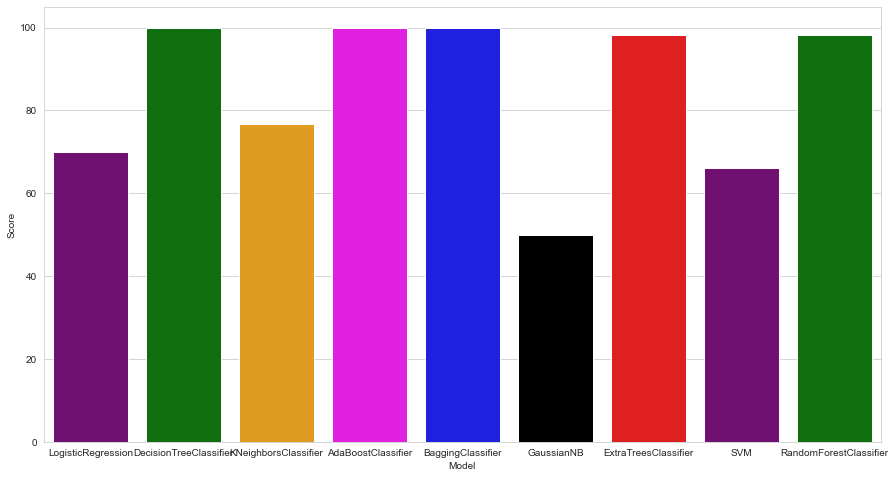

In [177]:
colors = ["purple", "green", "orange", "magenta","blue","black","red"]

sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.show()

In [176]:
df.columns

Index(['gender', 'playin_flag', 'rd1_win', 'rd2_win', 'rd3_win', 'rd4_win',
       'rd5_win', 'rd6_win', 'rd7_win', 'team_alive', 'team_id', 'team_name',
       'team_rating', 'team_region'],
      dtype='object')

<AxesSubplot:>

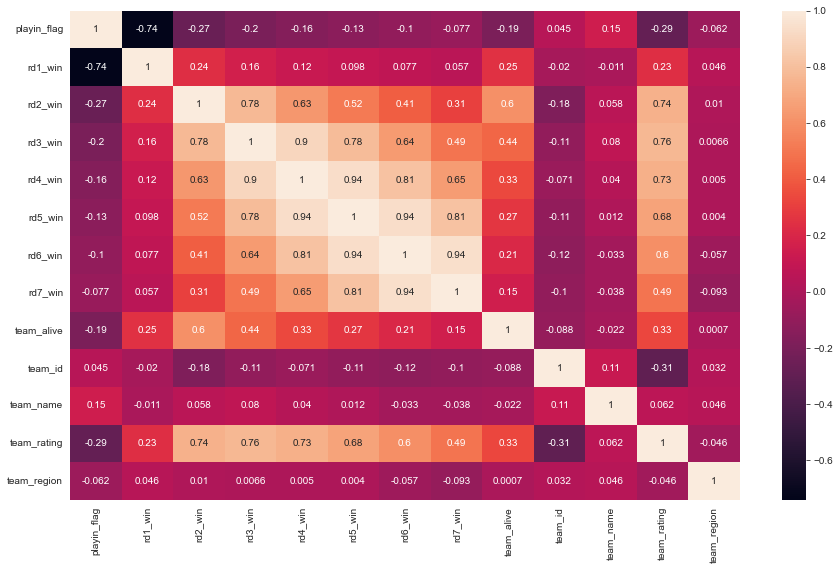

In [179]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True)

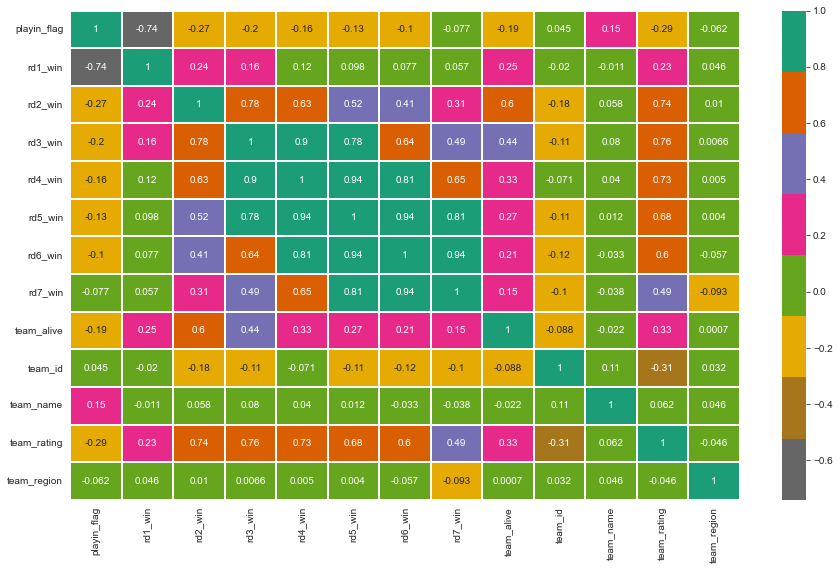

In [180]:
plt.figure(figsize=(15,9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,cmap='Dark2_r',linewidths=2)
plt.show()

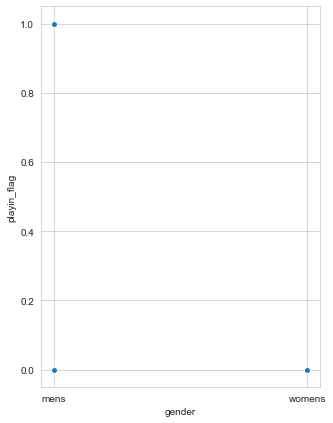

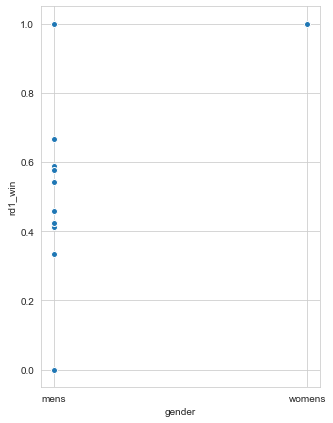

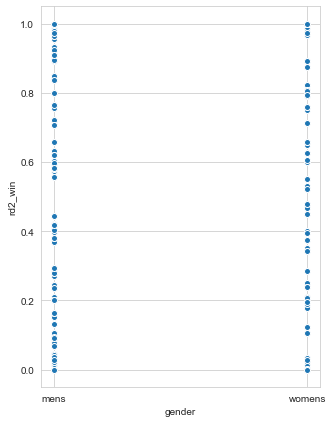

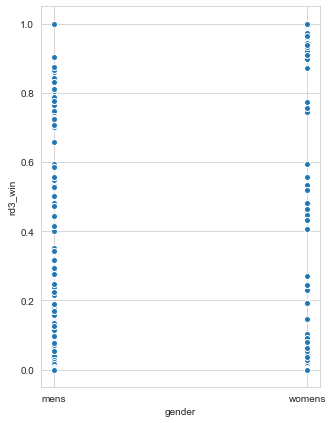

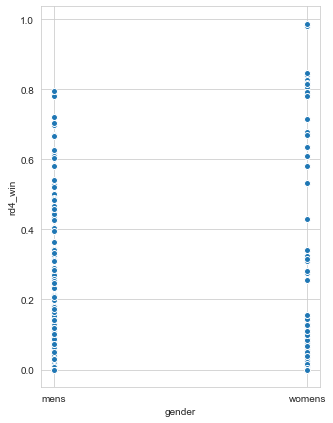

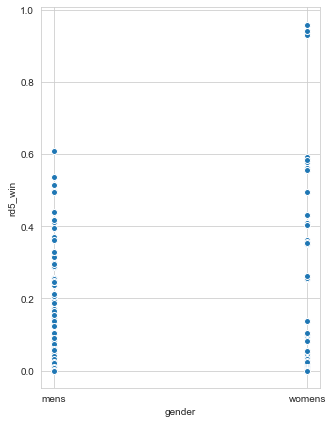

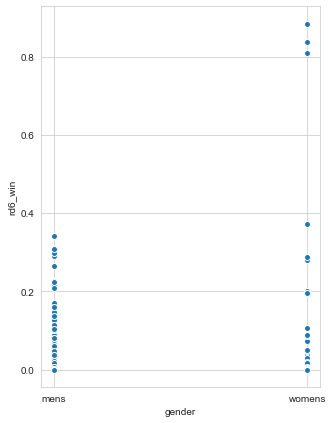

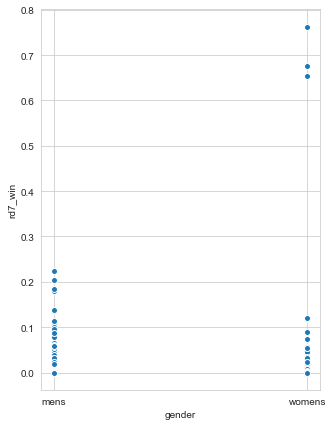

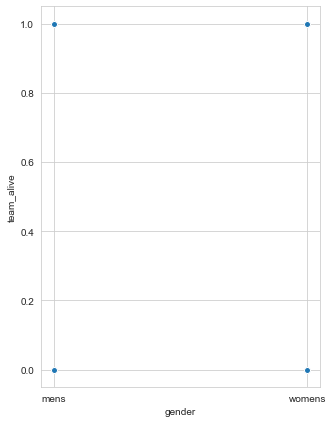

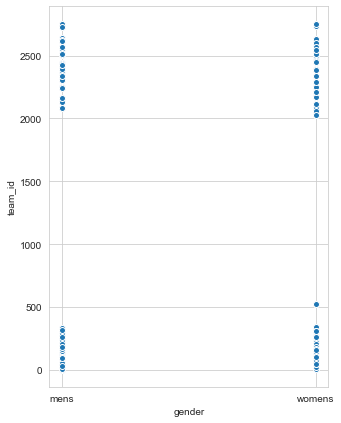

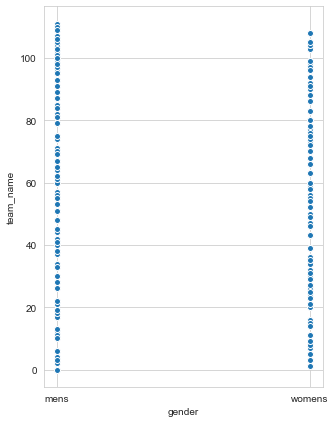

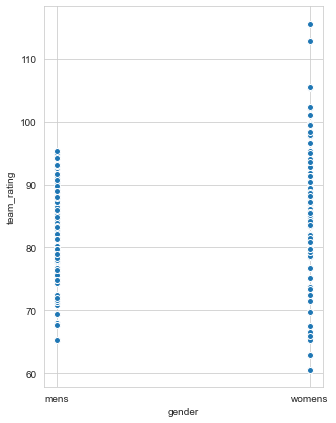

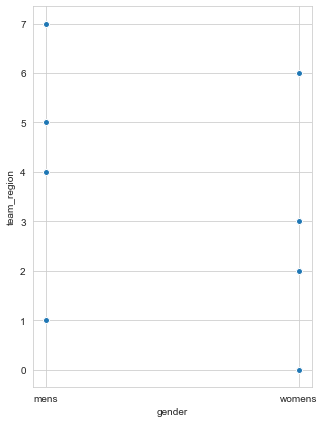

In [181]:
for i in [ 'playin_flag', 'rd1_win', 'rd2_win', 'rd3_win', 'rd4_win',
       'rd5_win', 'rd6_win', 'rd7_win', 'team_alive', 'team_id', 'team_name',
       'team_rating', 'team_region']:
    plt.figure(figsize=(5,7))
    sns.scatterplot(x=df.gender,y=df[i],data=df,linewidth=1)
    plt.show()

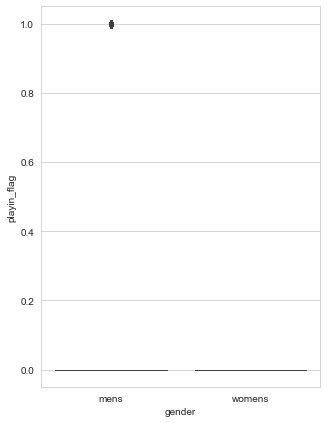

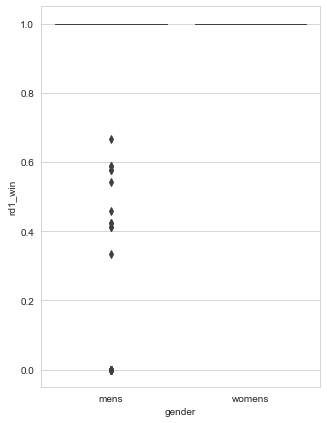

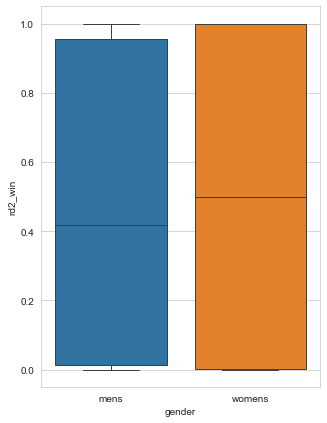

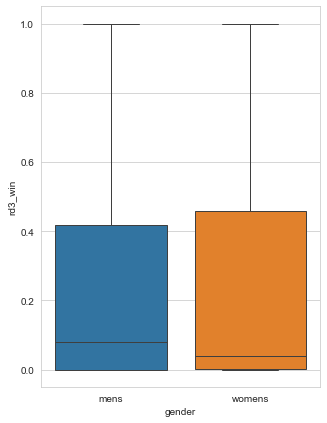

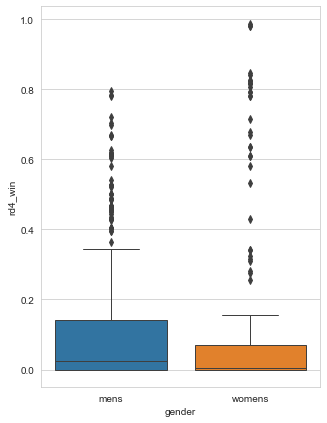

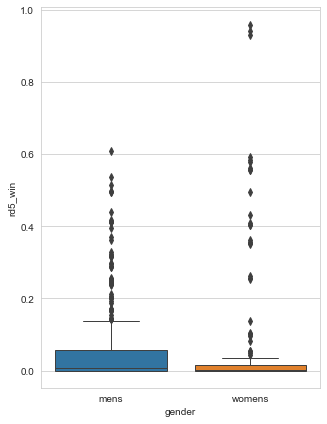

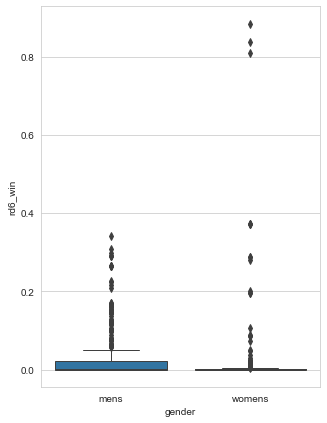

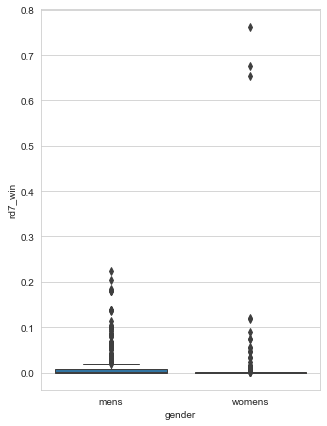

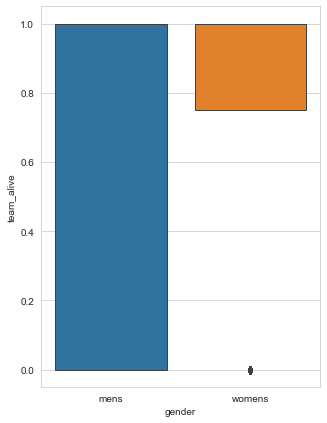

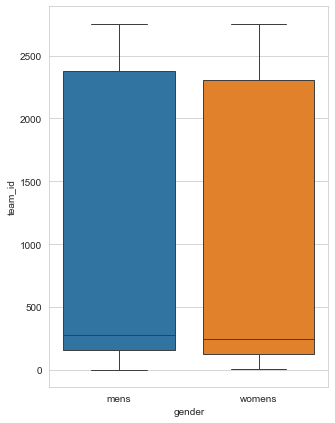

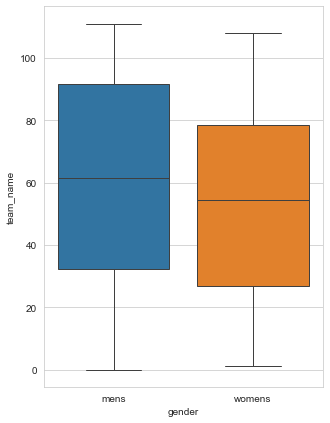

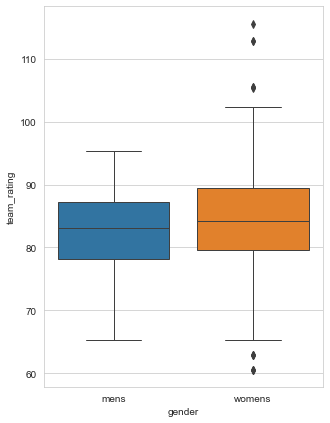

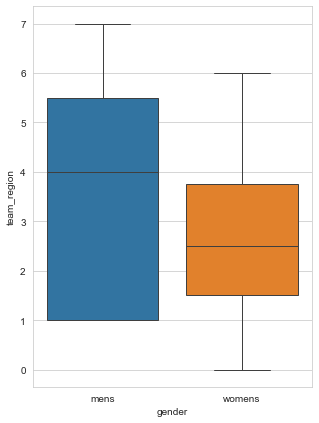

In [182]:
for i in [ 'playin_flag', 'rd1_win', 'rd2_win', 'rd3_win', 'rd4_win',
       'rd5_win', 'rd6_win', 'rd7_win', 'team_alive', 'team_id', 'team_name',
       'team_rating', 'team_region']:
    plt.figure(figsize=(5,7))
    sns.boxplot(x=df.gender,y=df[i],data=df,linewidth=1)
    plt.show()

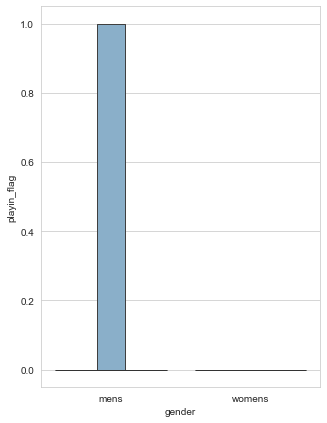

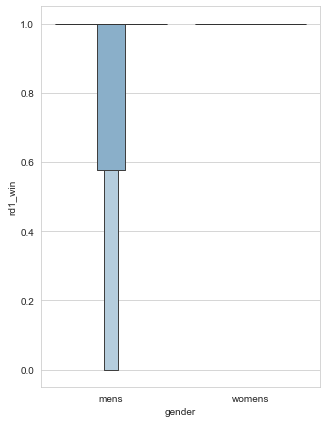

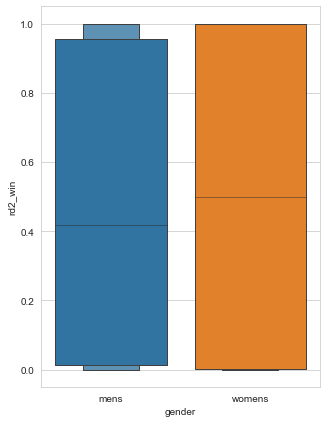

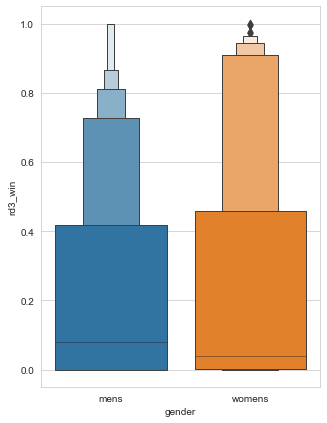

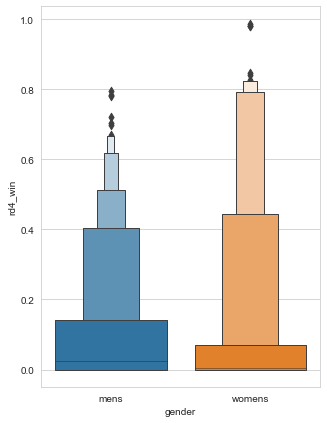

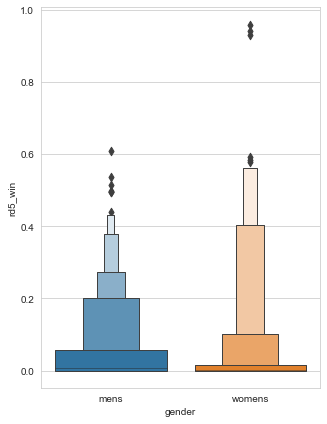

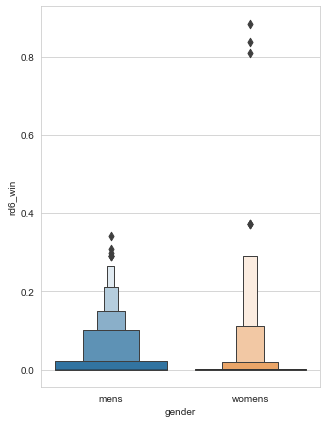

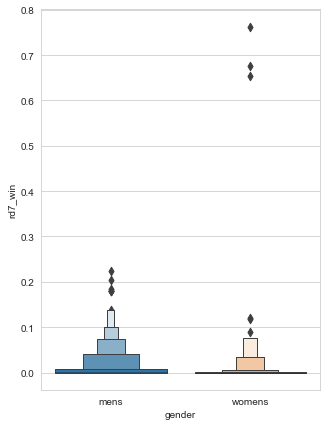

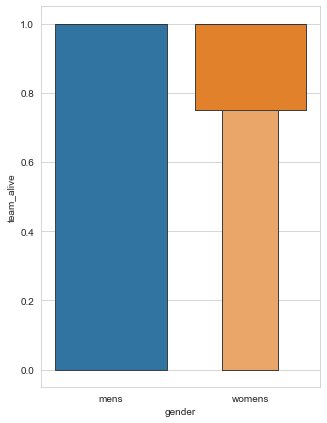

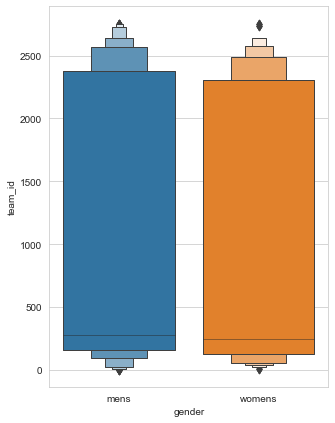

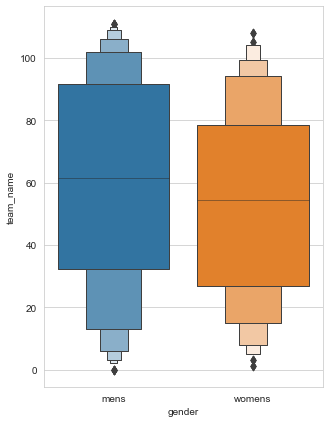

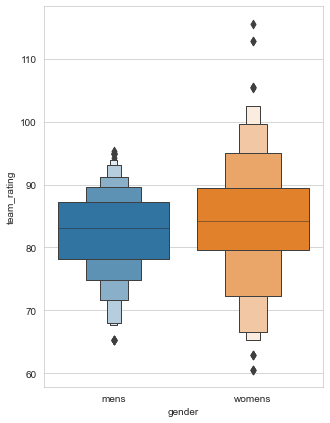

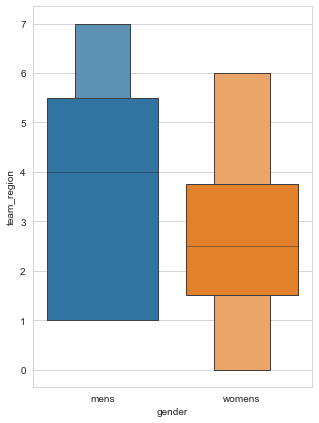

In [183]:
for i in [ 'playin_flag', 'rd1_win', 'rd2_win', 'rd3_win', 'rd4_win',
       'rd5_win', 'rd6_win', 'rd7_win', 'team_alive', 'team_id', 'team_name',
       'team_rating', 'team_region']:
    plt.figure(figsize=(5,7))
    sns.boxenplot(x=df.gender,y=df[i],data=df,linewidth=1)
    plt.show()

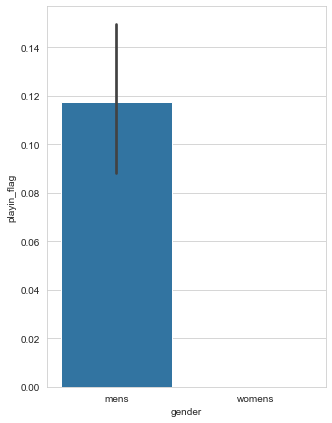

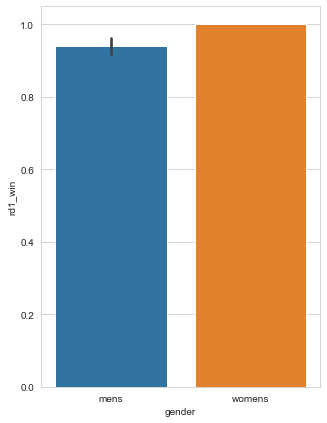

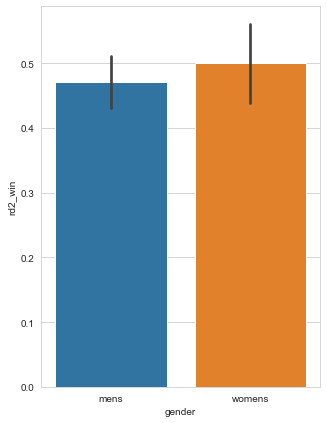

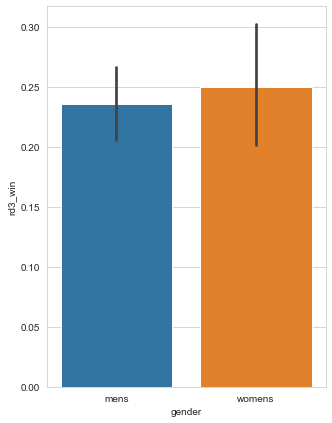

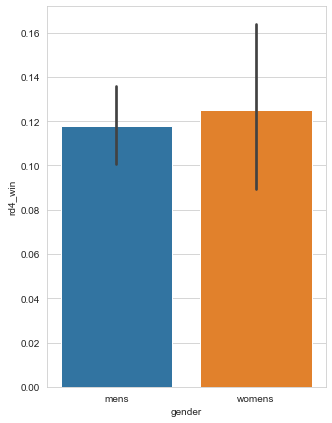

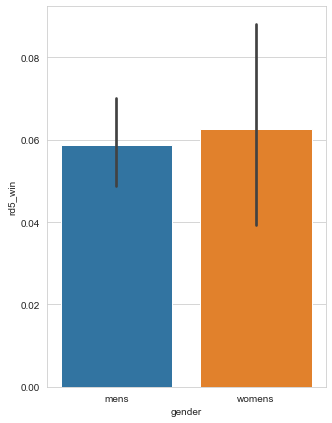

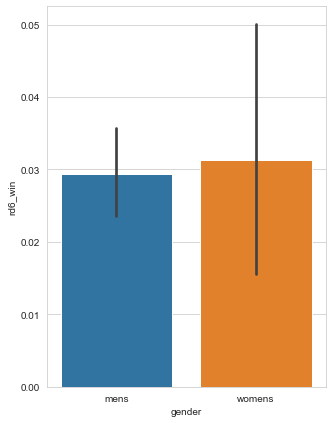

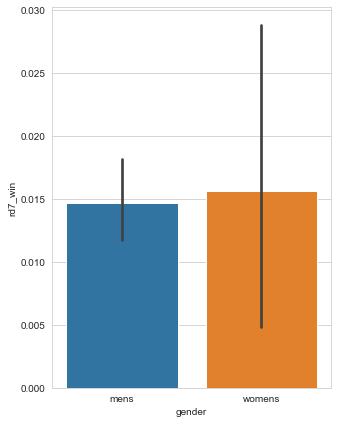

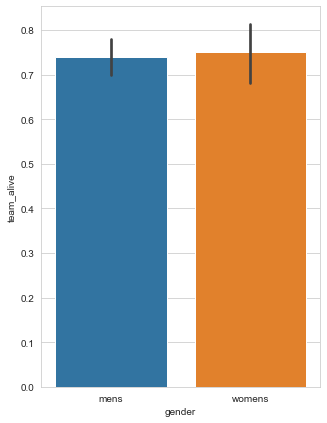

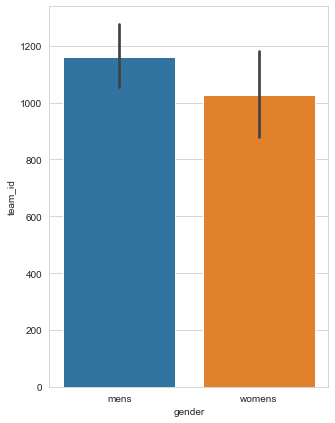

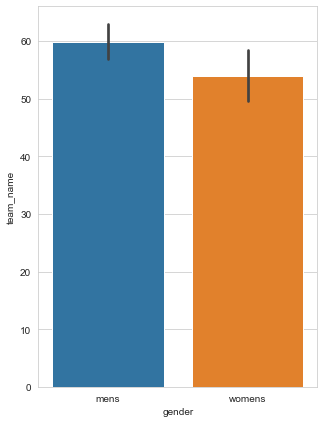

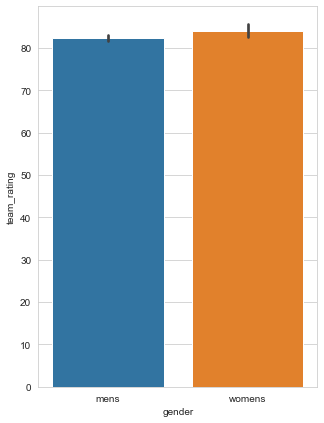

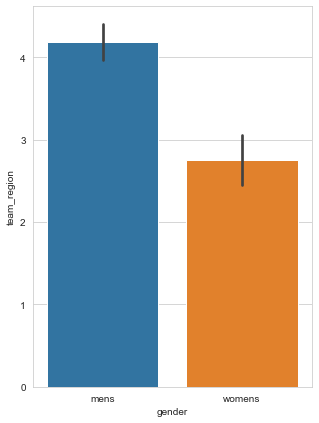

In [184]:
for i in [ 'playin_flag', 'rd1_win', 'rd2_win', 'rd3_win', 'rd4_win',
       'rd5_win', 'rd6_win', 'rd7_win', 'team_alive', 'team_id', 'team_name',
       'team_rating', 'team_region']:
    plt.figure(figsize=(5,7))
    sns.barplot(x=df.gender,y=df[i],data=df,linewidth=1)
    plt.show()

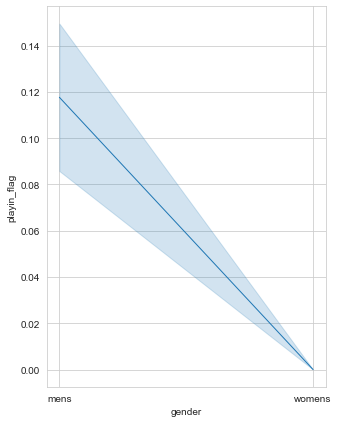

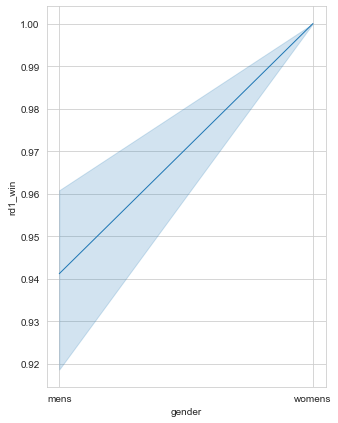

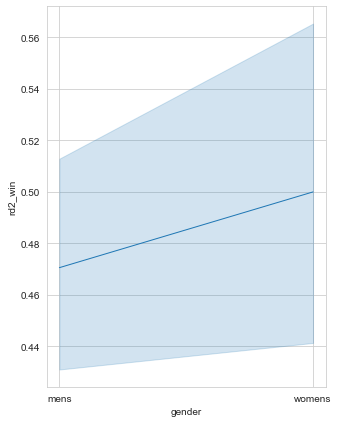

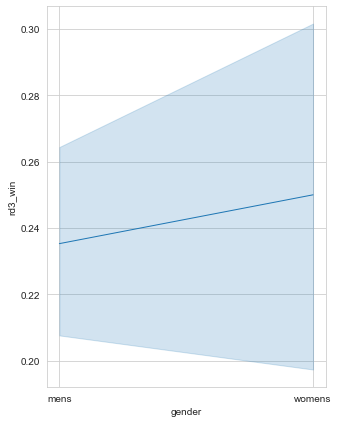

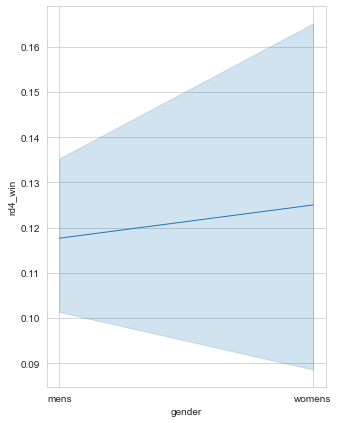

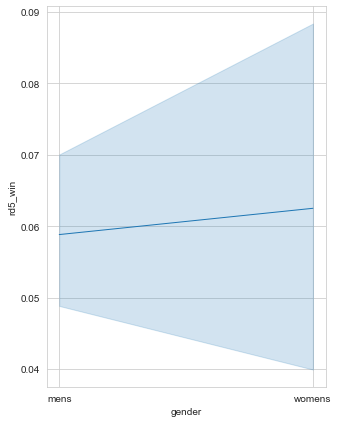

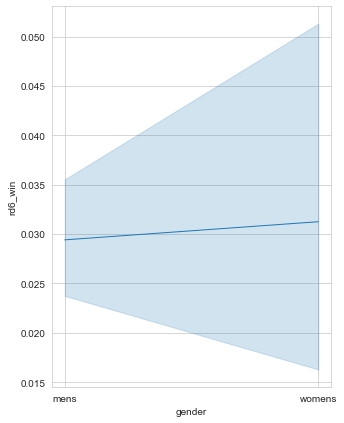

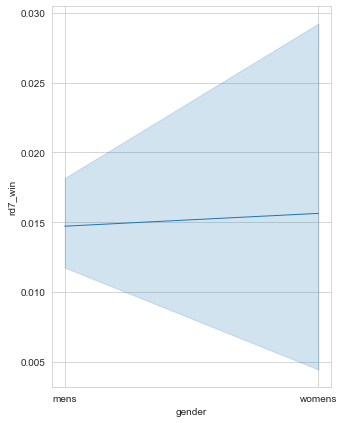

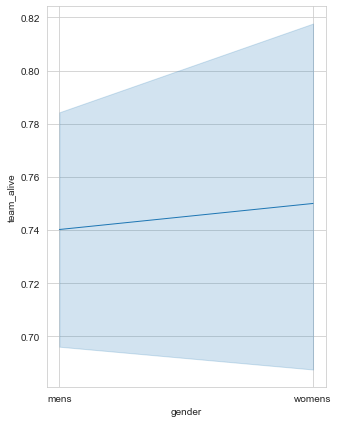

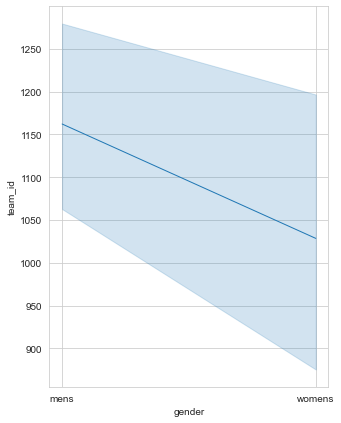

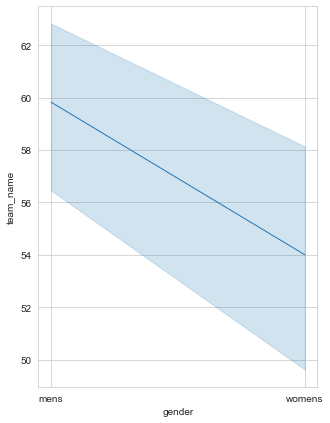

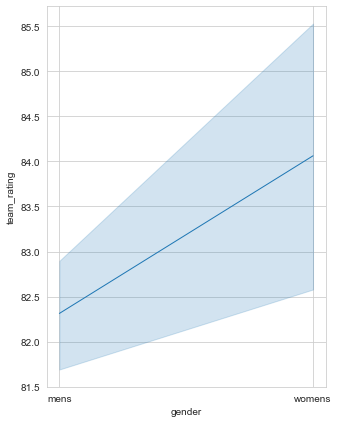

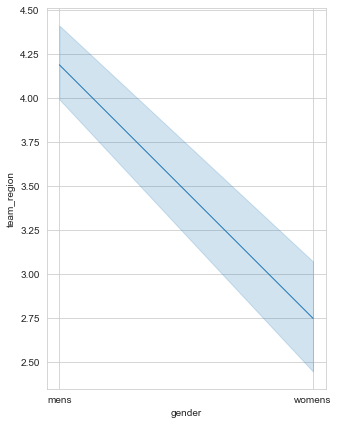

In [185]:
for i in [ 'playin_flag', 'rd1_win', 'rd2_win', 'rd3_win', 'rd4_win',
       'rd5_win', 'rd6_win', 'rd7_win', 'team_alive', 'team_id', 'team_name',
       'team_rating', 'team_region']:
    plt.figure(figsize=(5,7))
    sns.lineplot(x=df.gender,y=df[i],data=df,linewidth=1)
    plt.show()

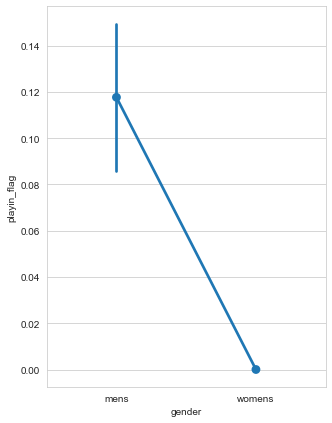

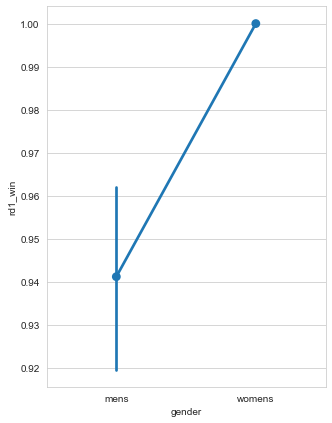

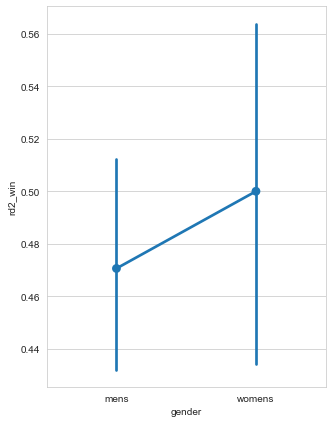

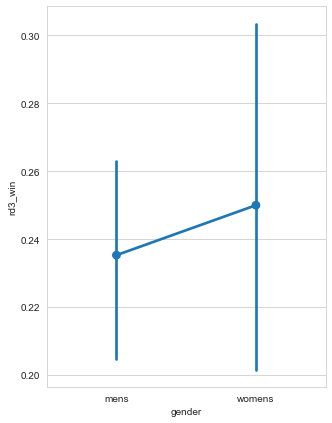

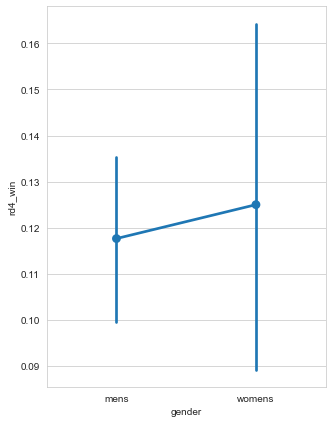

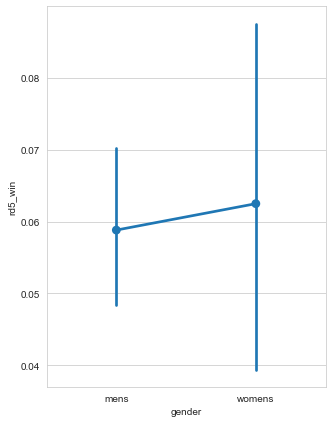

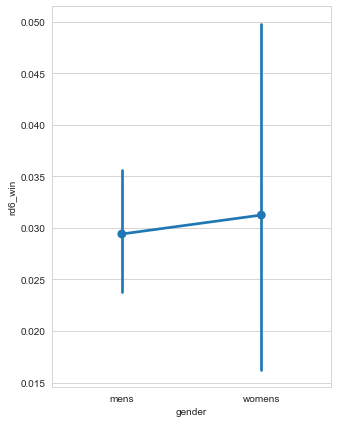

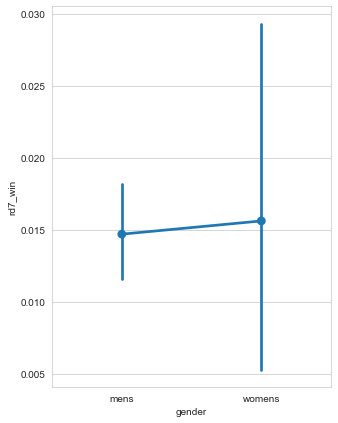

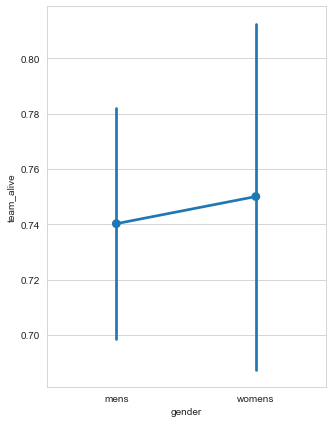

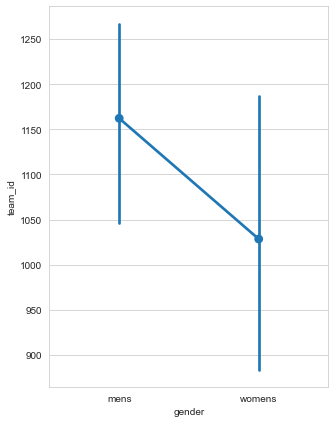

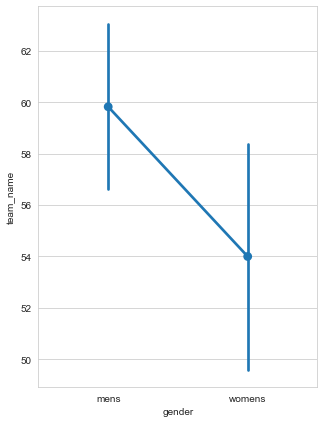

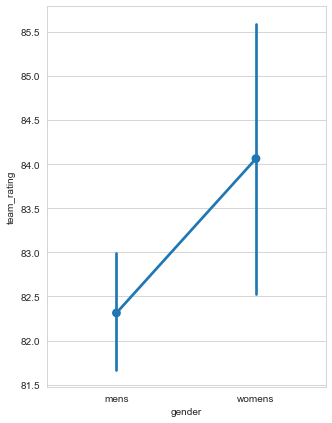

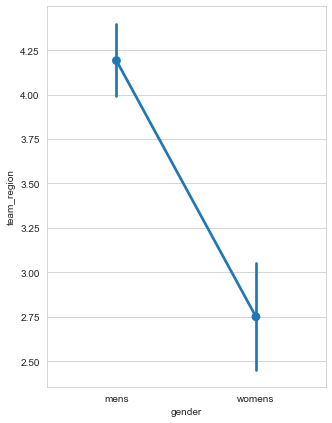

In [186]:
for i in [ 'playin_flag', 'rd1_win', 'rd2_win', 'rd3_win', 'rd4_win',
       'rd5_win', 'rd6_win', 'rd7_win', 'team_alive', 'team_id', 'team_name',
       'team_rating', 'team_region']:
    plt.figure(figsize=(5,7))
    sns.pointplot(x=df.gender,y=df[i],data=df,linewidth=1)
    plt.show()

<Figure size 360x504 with 0 Axes>

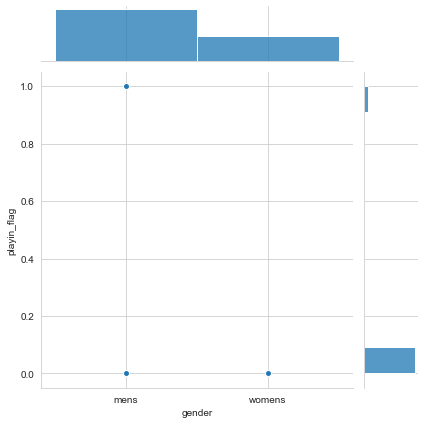

<Figure size 360x504 with 0 Axes>

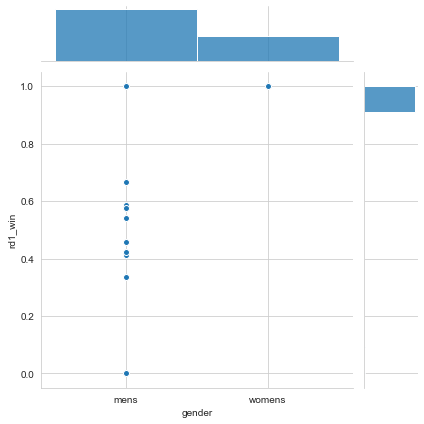

<Figure size 360x504 with 0 Axes>

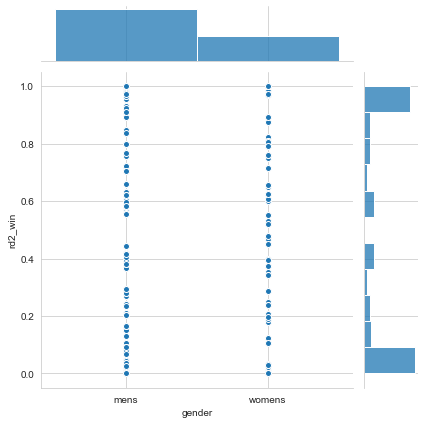

<Figure size 360x504 with 0 Axes>

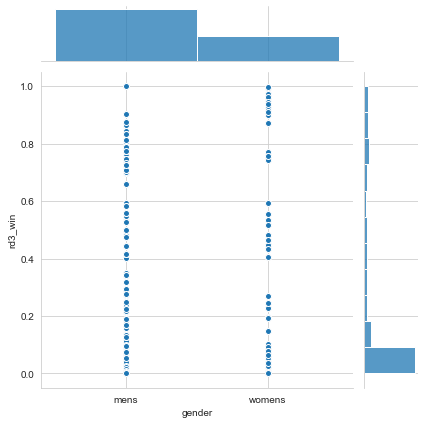

<Figure size 360x504 with 0 Axes>

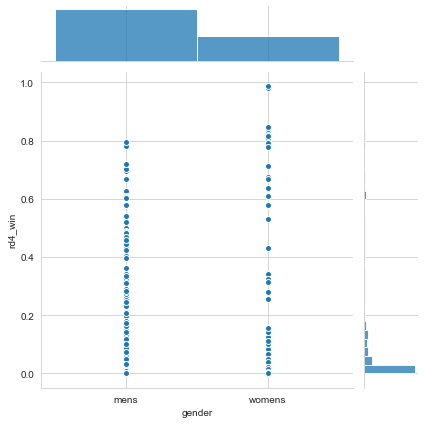

<Figure size 360x504 with 0 Axes>

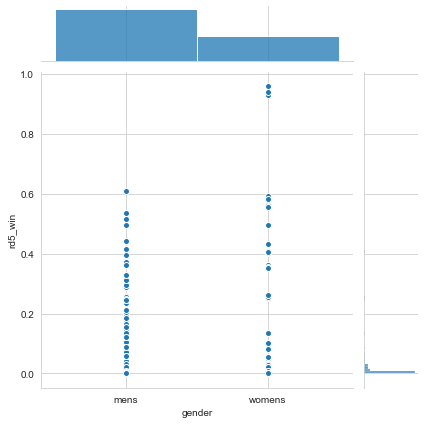

<Figure size 360x504 with 0 Axes>

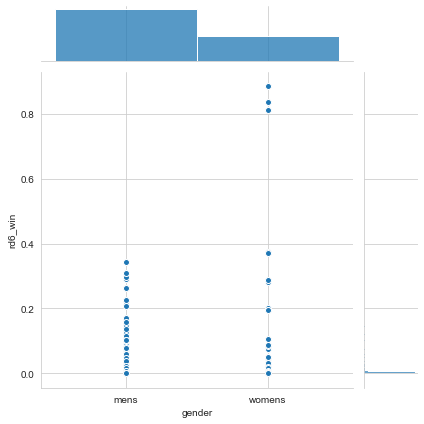

<Figure size 360x504 with 0 Axes>

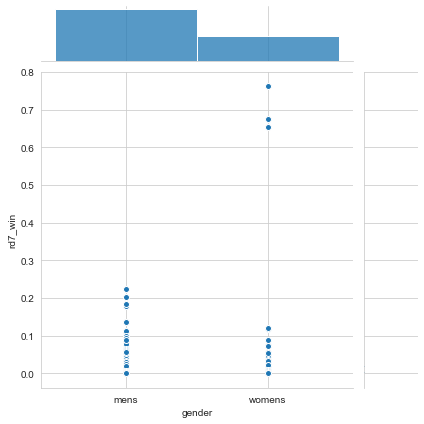

<Figure size 360x504 with 0 Axes>

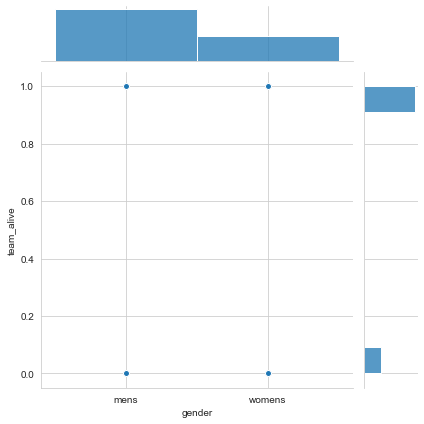

<Figure size 360x504 with 0 Axes>

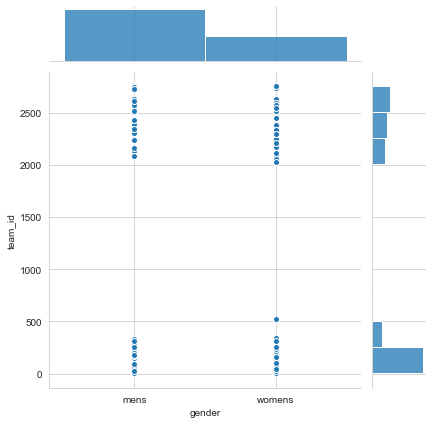

<Figure size 360x504 with 0 Axes>

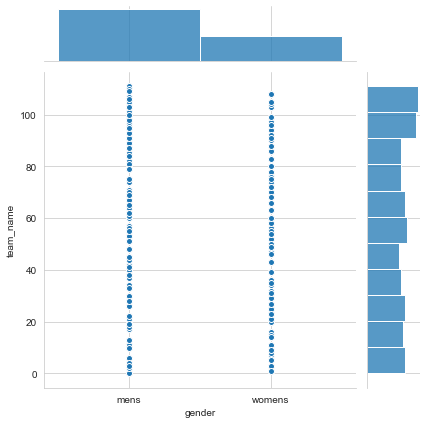

<Figure size 360x504 with 0 Axes>

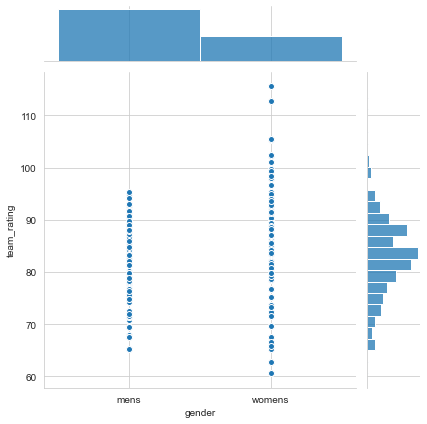

<Figure size 360x504 with 0 Axes>

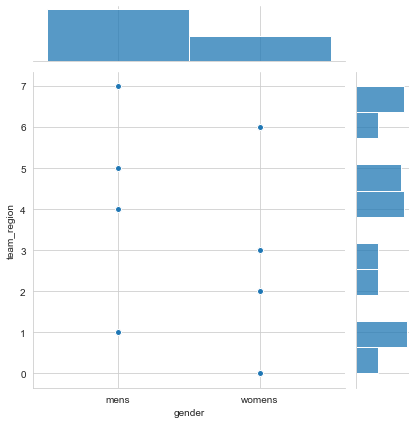

In [189]:
for i in [ 'playin_flag', 'rd1_win', 'rd2_win', 'rd3_win', 'rd4_win',
       'rd5_win', 'rd6_win', 'rd7_win', 'team_alive', 'team_id', 'team_name',
       'team_rating', 'team_region']:
    plt.figure(figsize=(5,7))
    sns.jointplot(x=df.gender,y=df[i],data=df,linewidth=1)
    plt.show()

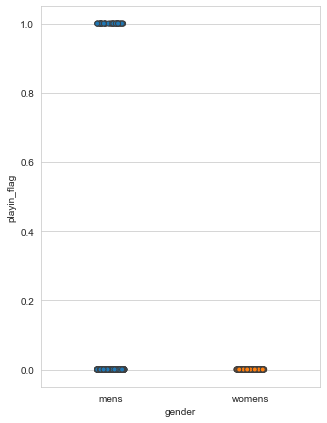

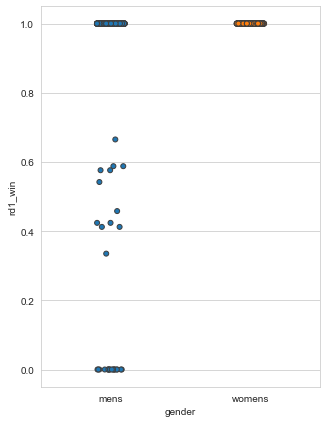

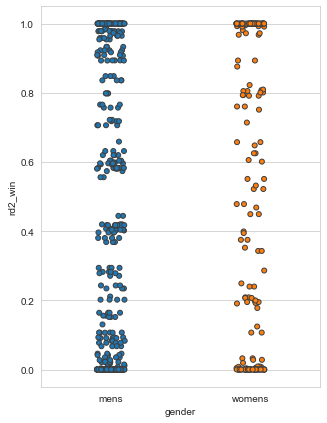

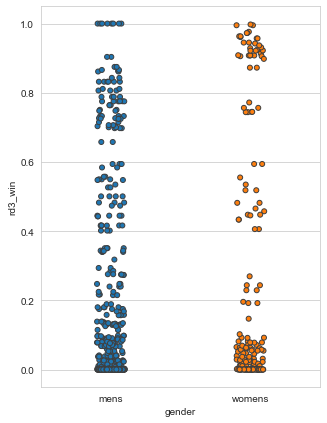

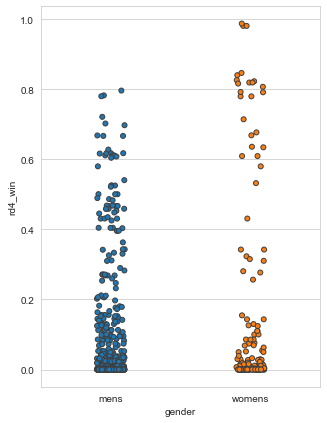

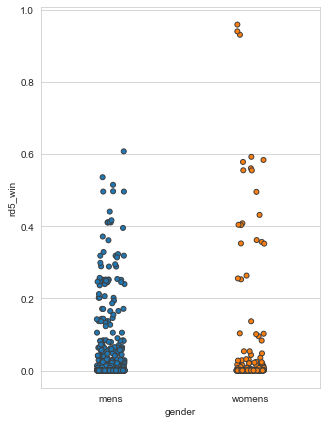

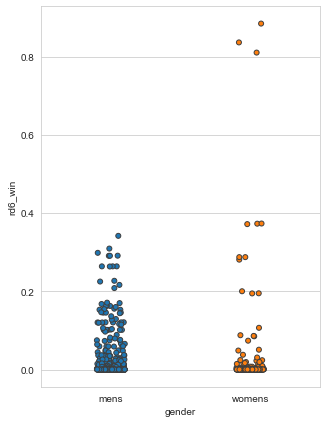

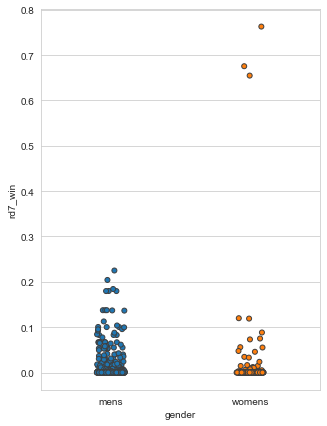

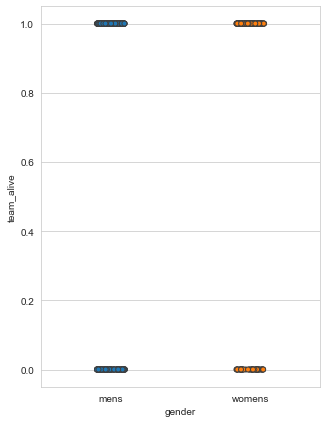

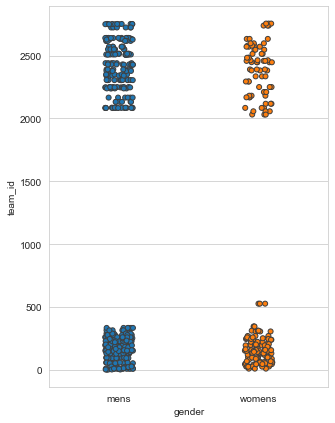

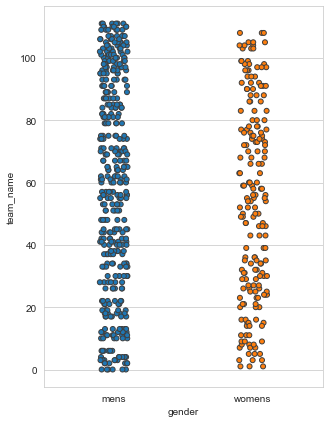

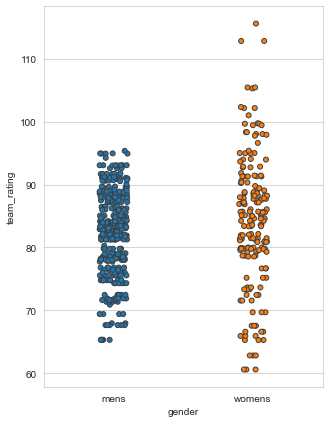

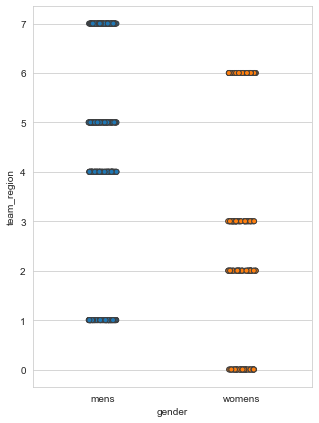

In [190]:
for i in [ 'playin_flag', 'rd1_win', 'rd2_win', 'rd3_win', 'rd4_win',
       'rd5_win', 'rd6_win', 'rd7_win', 'team_alive', 'team_id', 'team_name',
       'team_rating', 'team_region']:
    plt.figure(figsize=(5,7))
    sns.stripplot(x=df.gender,y=df[i],data=df,linewidth=1)
    plt.show()

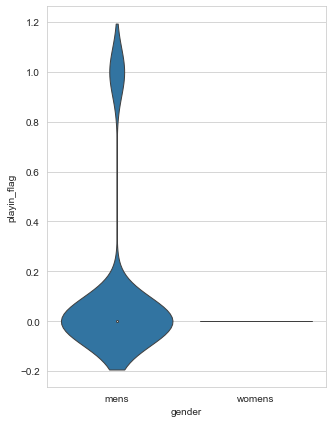

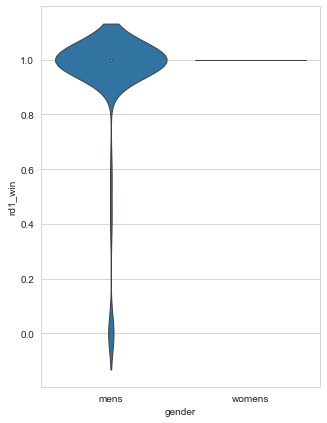

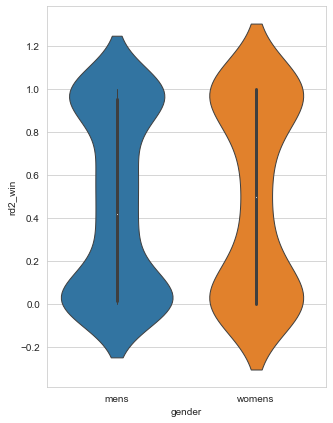

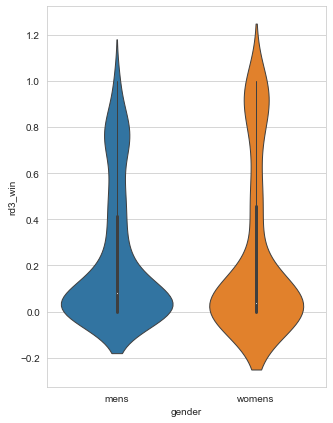

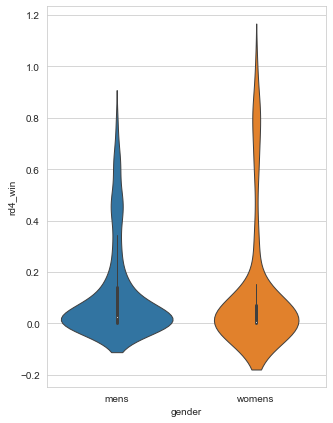

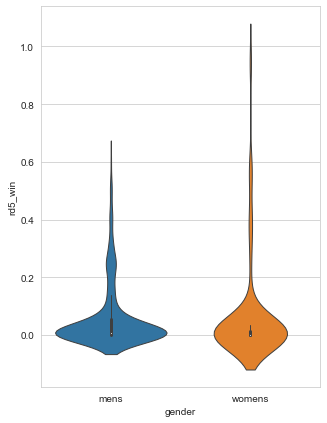

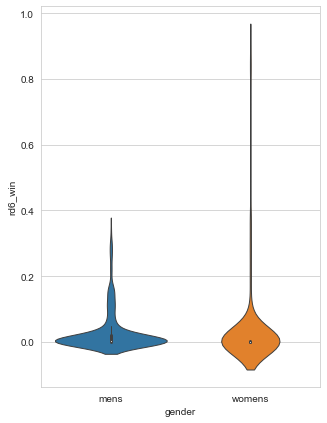

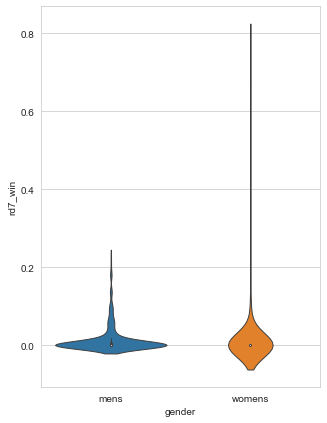

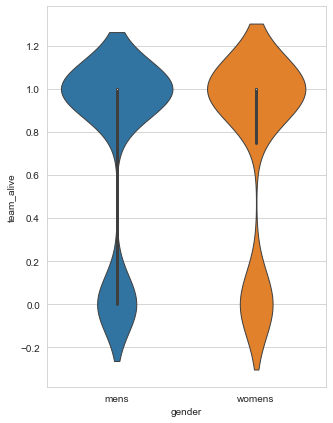

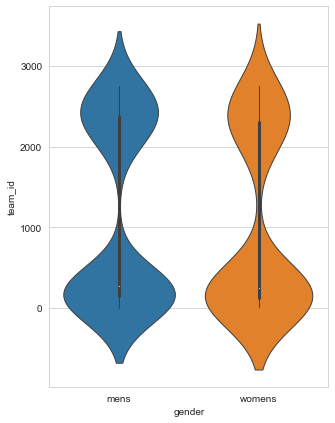

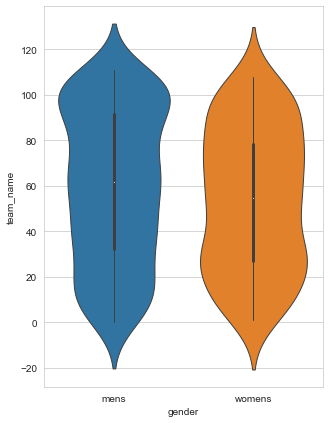

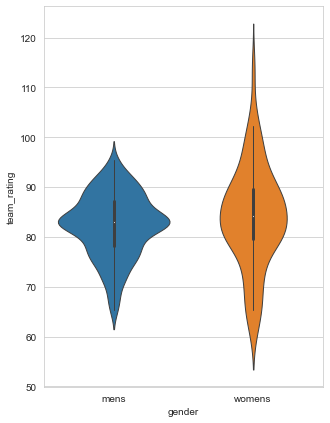

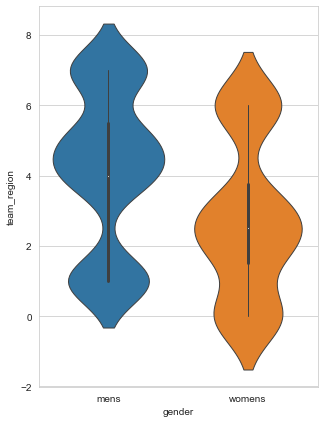

In [191]:
for i in [ 'playin_flag', 'rd1_win', 'rd2_win', 'rd3_win', 'rd4_win',
       'rd5_win', 'rd6_win', 'rd7_win', 'team_alive', 'team_id', 'team_name',
       'team_rating', 'team_region']:
    plt.figure(figsize=(5,7))
    sns.violinplot(x=df.gender,y=df[i],data=df,linewidth=1)
    plt.show()

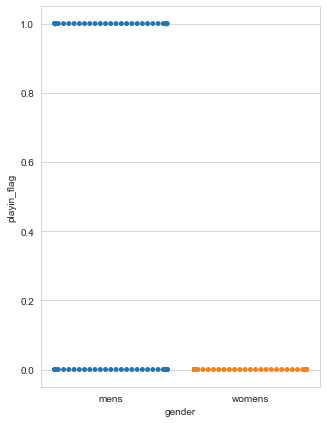

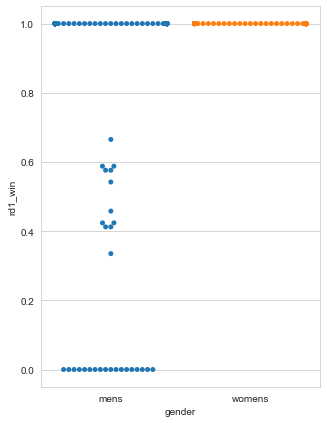

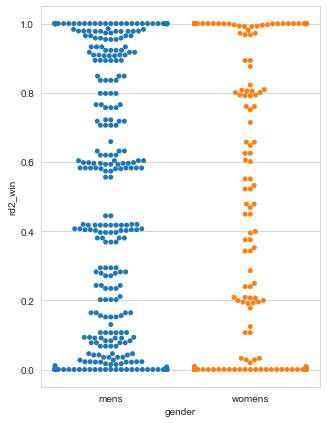

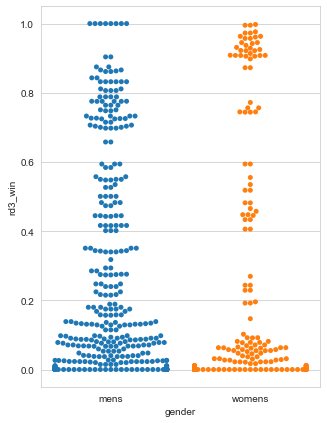

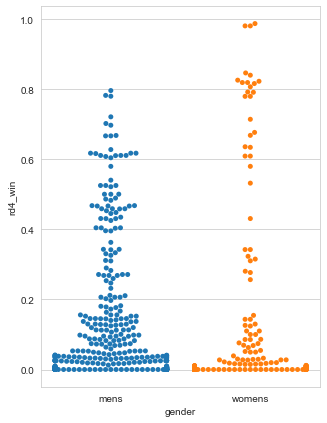

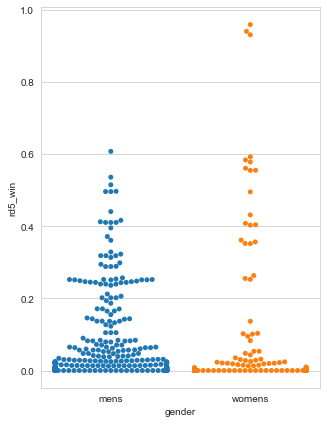

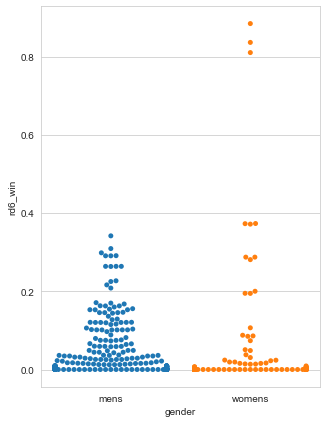

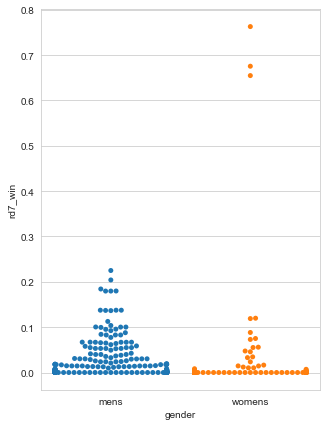

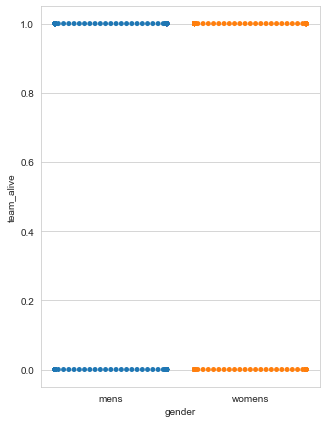

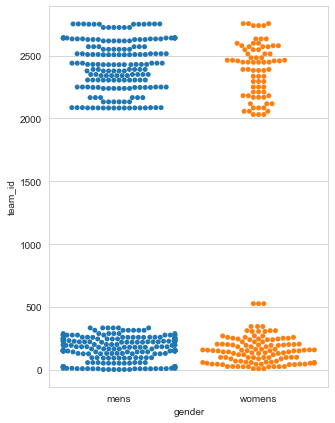

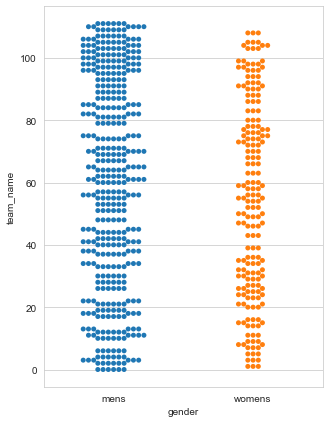

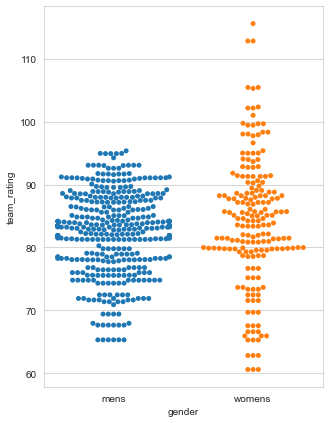

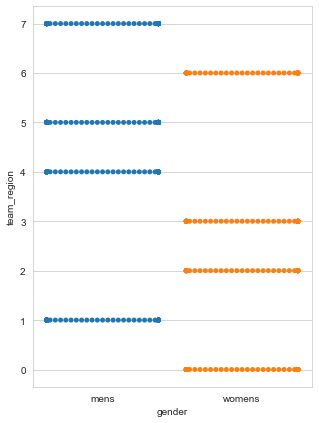

In [194]:
for i in [ 'playin_flag', 'rd1_win', 'rd2_win', 'rd3_win', 'rd4_win',
       'rd5_win', 'rd6_win', 'rd7_win', 'team_alive', 'team_id', 'team_name',
       'team_rating', 'team_region']:
    plt.figure(figsize=(5,7))
    sns.swarmplot(x=df.gender,y=df[i],data=df)
    plt.show()

In [200]:
import sweetviz as sv

In [201]:
data=sv.analyze(df)
data.show_html('Analyze.html')

                                             |                                             | [  0%]   00:00 ->…

Report Analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [202]:
from IPython.display import IFrame

In [203]:
IFrame(src='Analyze.html',width=1000,height=600)